In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diamonds dataset (raw CSV link from seaborn-data GitHub)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"

# Load dataset
df = pd.read_csv(url)

# Show first 5 rows
print(df.head())
print(df.shape)

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
(53940, 10)


# 🔍: Separate Numerical and Categorical Columns

In [4]:
# Numerical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
# Categorical columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# 🖨 Print results
print("📊 Numerical Columns:")
print(numerical_cols)

print("\n🧩 Categorical Columns:")
print(categorical_cols)


📊 Numerical Columns:
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

🧩 Categorical Columns:
['cut', 'color', 'clarity']


In [5]:
print(f"🔢 Numerical Features: {len(numerical_cols)}")
print(f"🧩 Categorical Features: {len(categorical_cols)}")

🔢 Numerical Features: 7
🧩 Categorical Features: 3


In [6]:
# Aggregate data: average price by carat (rounded to nearest 0.1 for grouping)
df['carat_round'] = df['carat'].round(1)
avg_price = df.groupby('carat_round')['price'].mean()
print(df["carat_round"].head(10))
print( "\n")
print(avg_price.head(10))

0    0.2
1    0.2
2    0.2
3    0.3
4    0.3
5    0.2
6    0.2
7    0.3
8    0.2
9    0.2
Name: carat_round, dtype: float64


carat_round
0.2     506.132484
0.3     703.151051
0.4     922.707741
0.5    1589.676285
0.6    1871.722380
0.7    2622.875800
0.8    2997.600304
0.9    3940.235430
1.0    5422.106437
1.1    6013.529945
Name: price, dtype: float64


## ⭐: Line plot

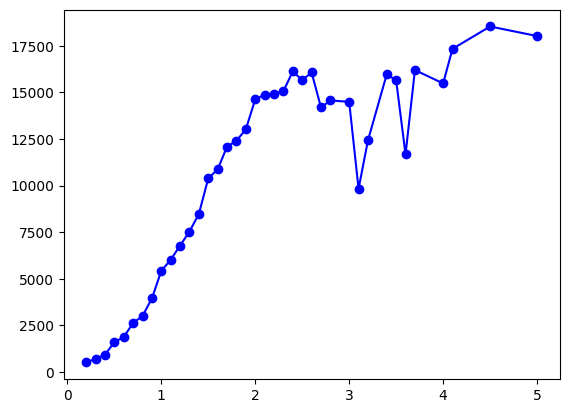

In [7]:
plt.plot(avg_price.index, avg_price.values, marker='o', color='blue')

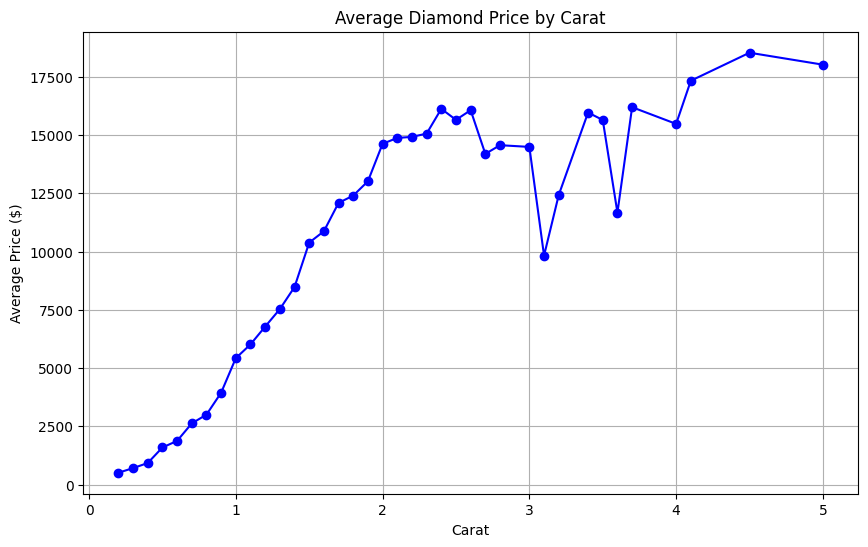

In [8]:
# Line plot
plt.figure(figsize=(10,6))
plt.plot(avg_price.index, avg_price.values, marker='o', color='blue')
plt.title('Average Diamond Price by Carat')
plt.xlabel('Carat')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

## ⭐: Scatter plot

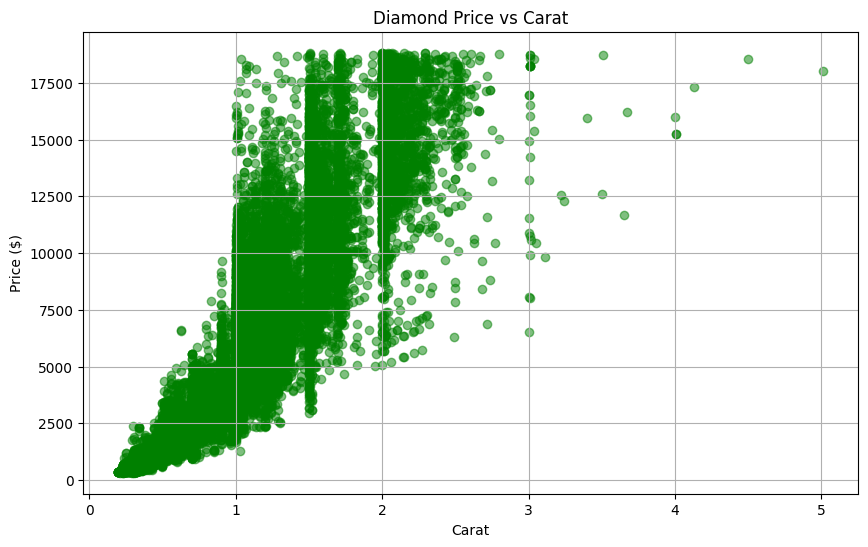

In [9]:
# Scatter plot: Carat vs Price
plt.figure(figsize=(10,6))
plt.scatter(df['carat'], df['price'], alpha=0.5, color='green')
plt.title('Diamond Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

## ⭐: Bar Plot

In [10]:
# Aggregate data: average price by cut
avg_price_cut = df.groupby('cut')['price'].mean()

print("avg_price_cut: \n",avg_price_cut)

avg_price_cut: 
 cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64


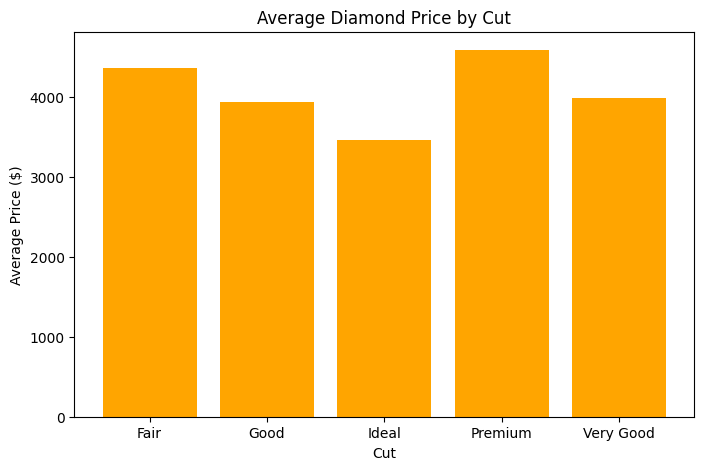

In [11]:

# Bar plot
plt.figure(figsize=(8,5))
plt.bar(avg_price_cut.index, avg_price_cut.values, color='orange')
plt.title('Average Diamond Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Average Price ($)')
plt.show()

# ⭐: Histogram of Price

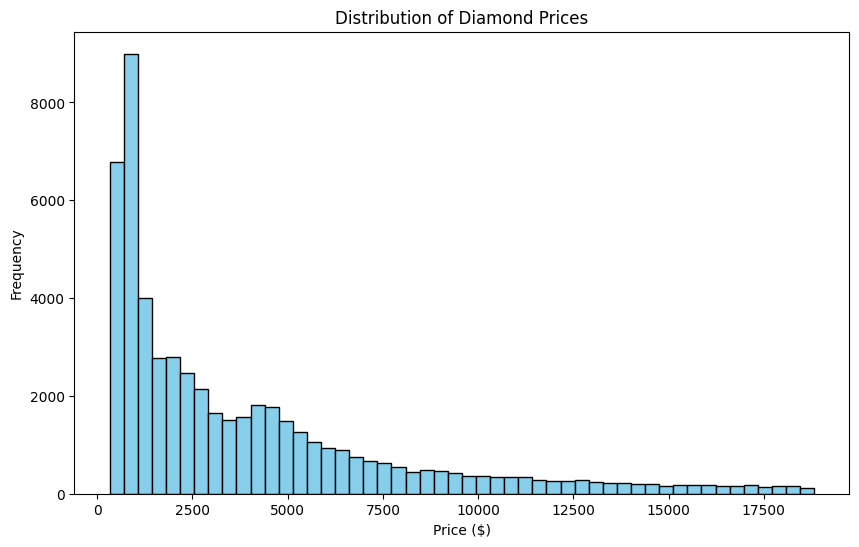

In [12]:
# Histogram of Price
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# ⭐: Box plot: Price by Cut


<Figure size 800x600 with 0 Axes>

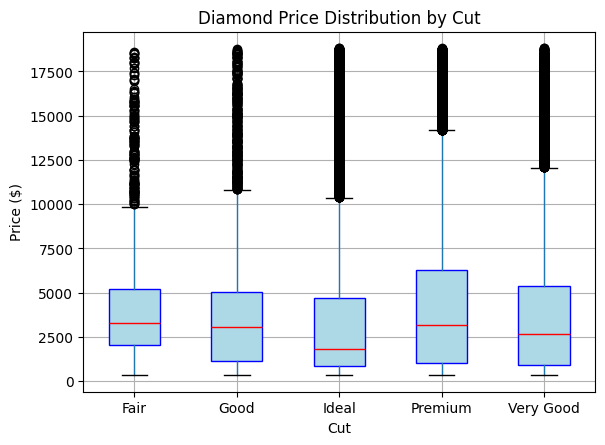

In [13]:
# Box plot: Price by Cut
plt.figure(figsize=(8,6))
df.boxplot(column='price', by='cut', grid=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red'))
plt.title('Diamond Price Distribution by Cut')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Cut')
plt.ylabel('Price ($)')
plt.show()


# ⭐: Pie chart


In [14]:
# Count of diamonds by cut
cut_counts = df['cut'].value_counts()

print("cut_counts:\n",cut_counts)

cut_counts:
 cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


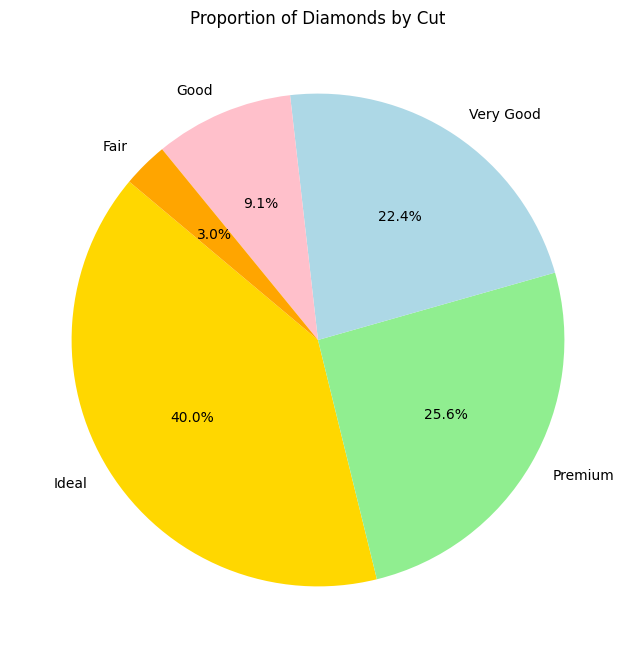

In [15]:

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightblue', 'pink', 'orange'])
plt.title('Proportion of Diamonds by Cut')
plt.show()

# ⭐: Heatmap

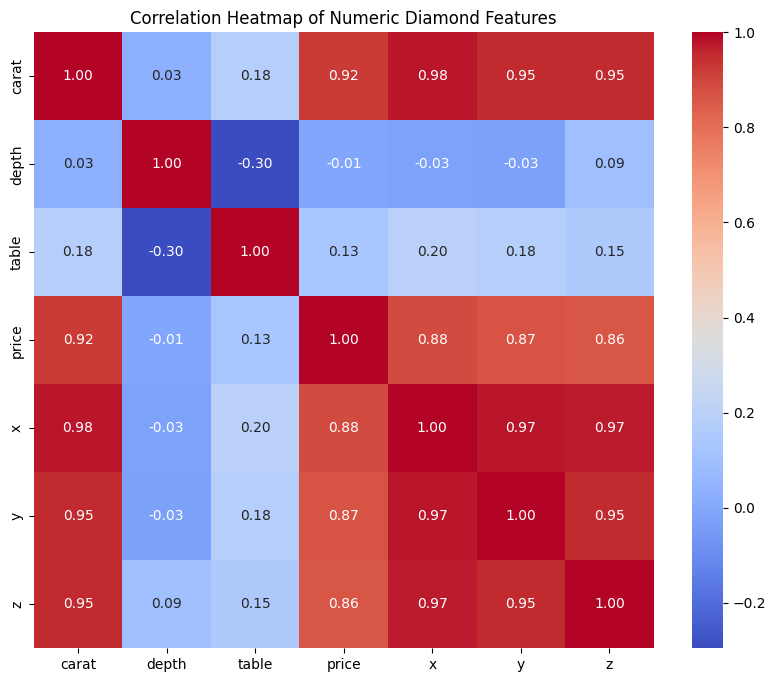

In [16]:
# Load Diamonds dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
df = pd.read_csv(url)

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Diamond Features')
plt.show()


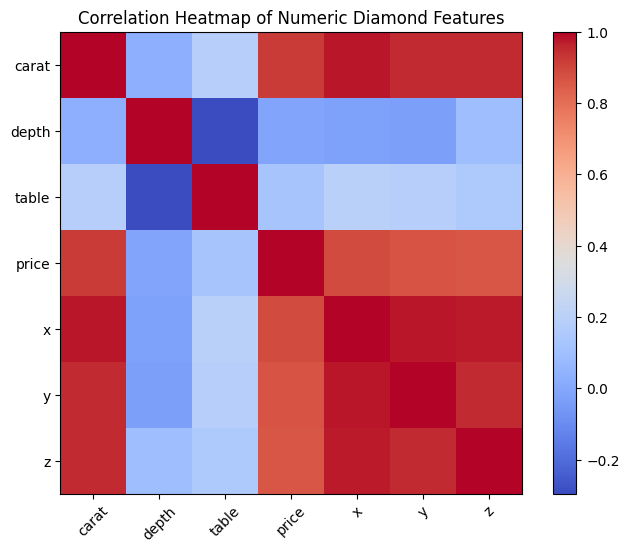

In [17]:
# Correlation matrix
correlation = df[["carat","depth","table","price","x","y","z"]].corr()

# Heatmap
plt.figure(figsize=(8,6))
plt.imshow(correlation, cmap="coolwarm", interpolation="none")
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title("Correlation Heatmap of Numeric Diamond Features")
plt.show()

# ⭐: Subplots

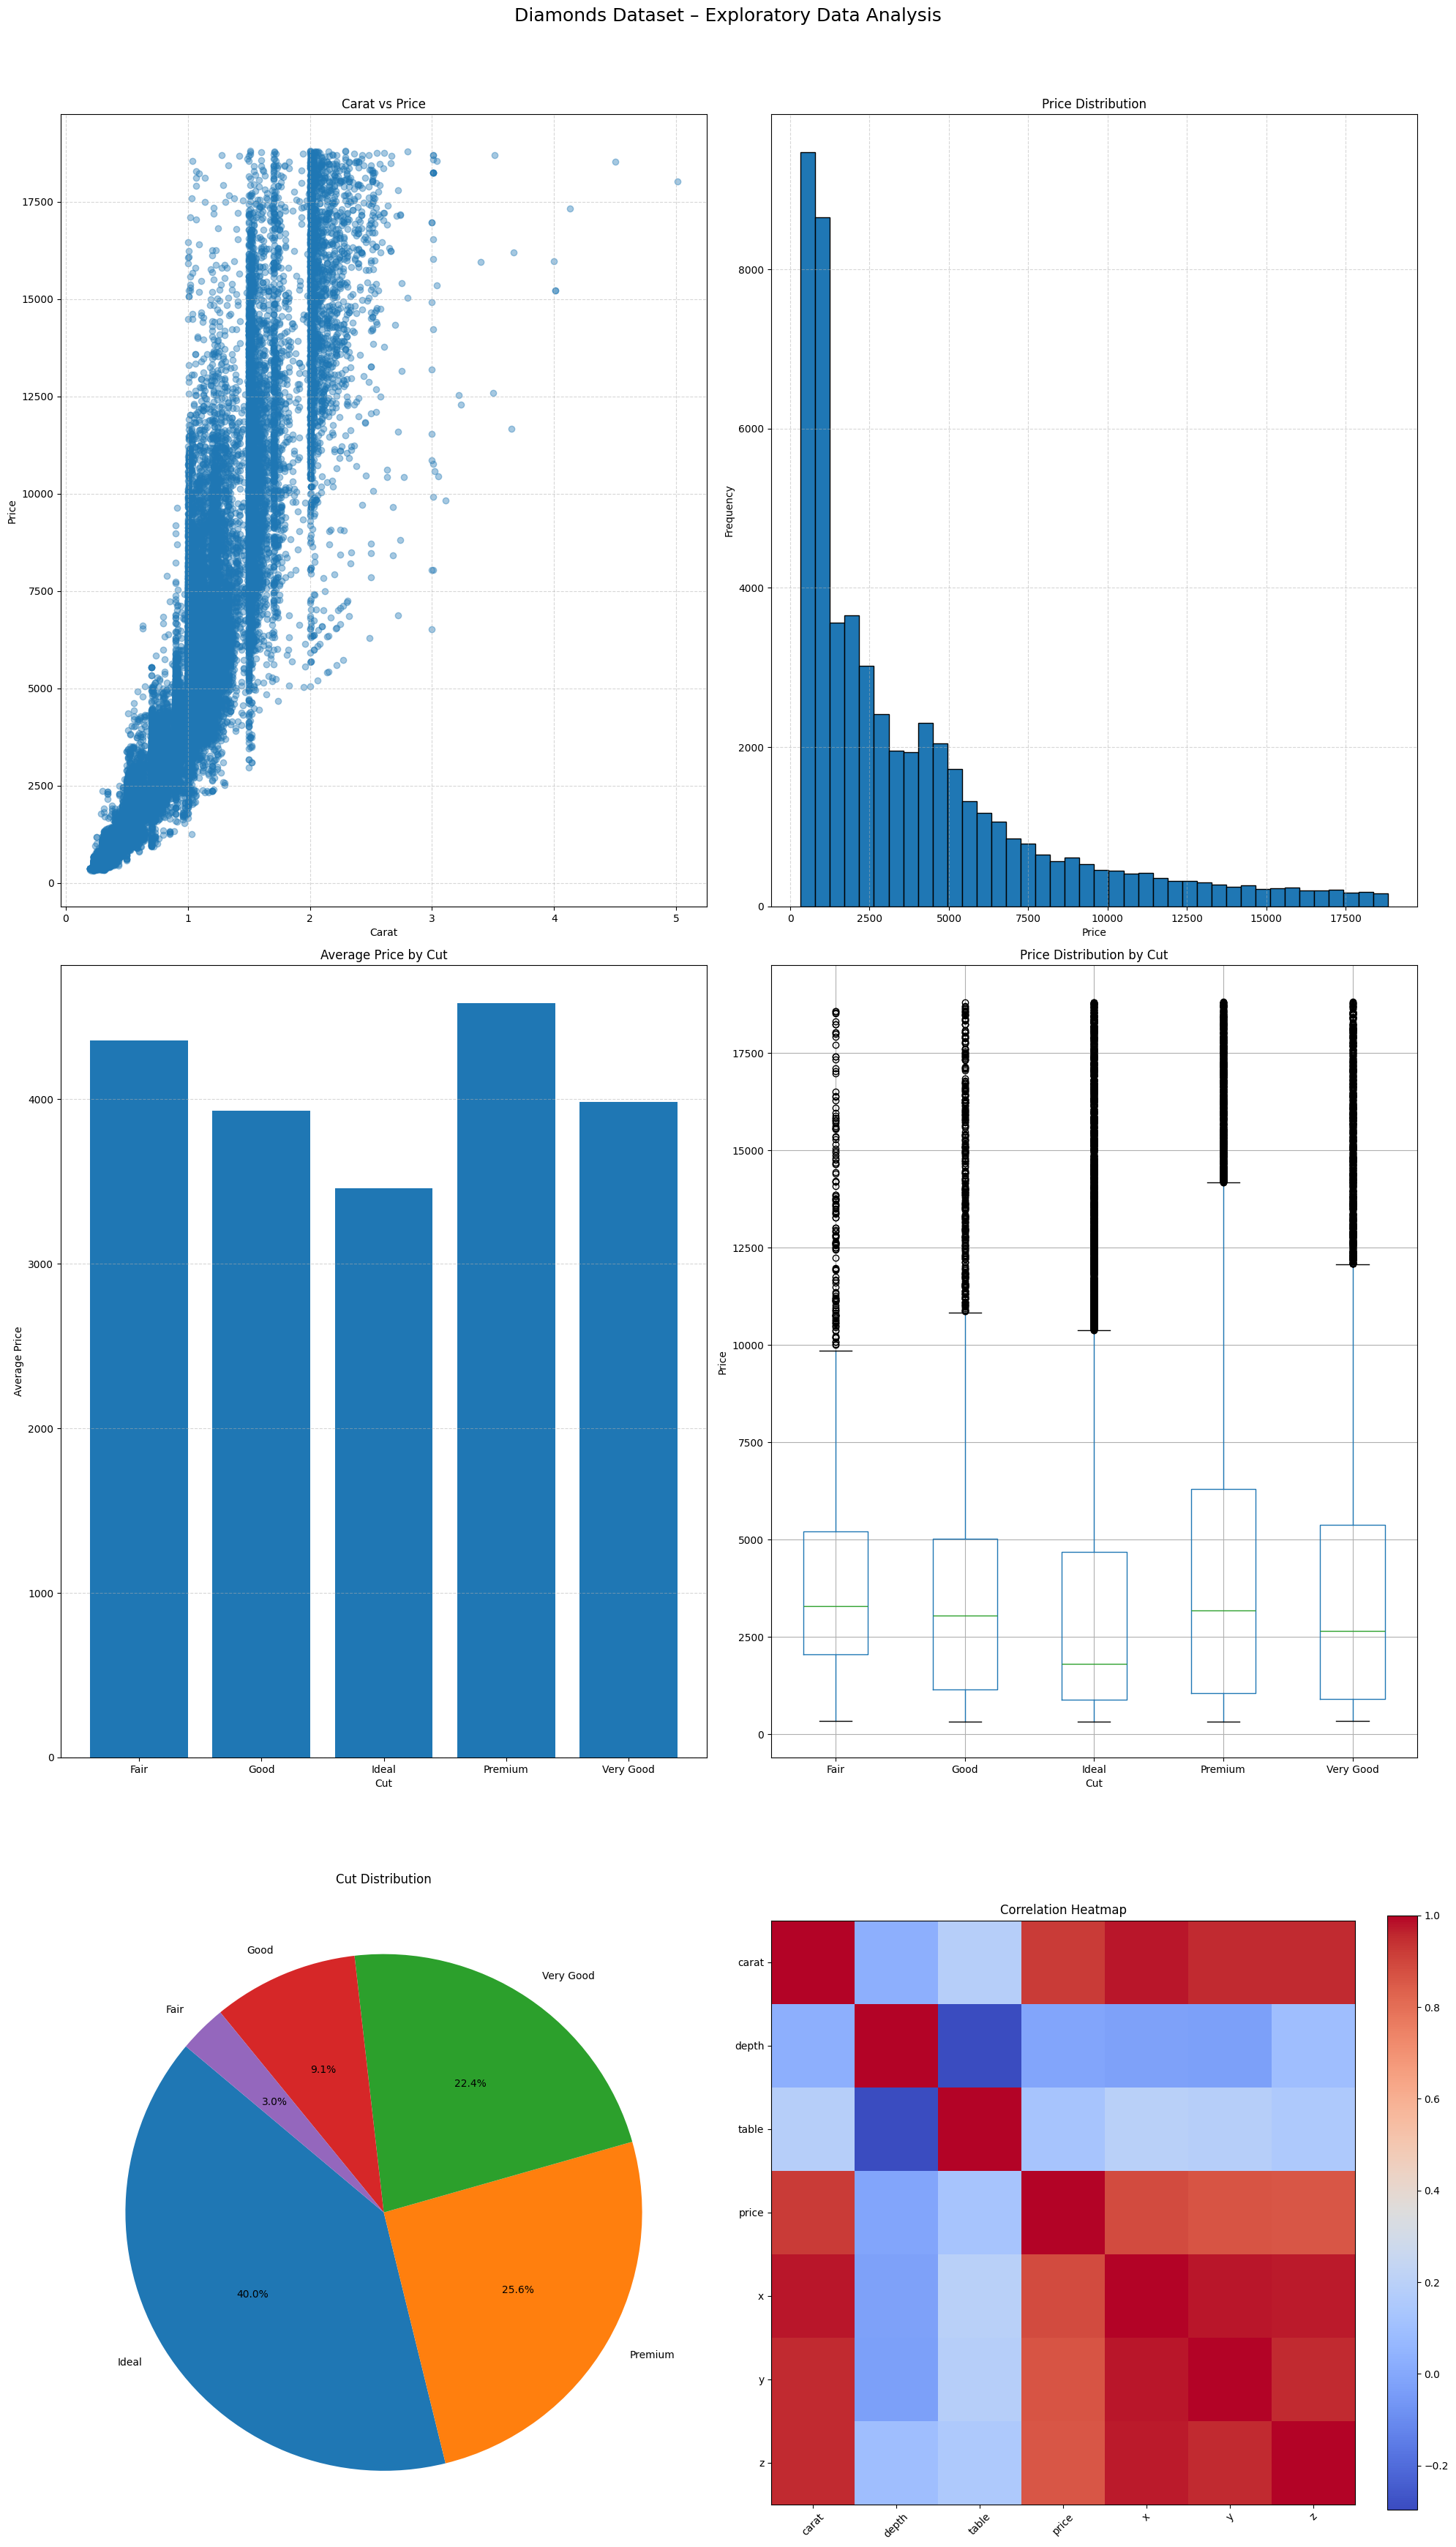

In [18]:
# Create clean subplot layout
fig, axes = plt.subplots(3, 2, figsize=(20, 35))
fig.suptitle("Diamonds Dataset – Exploratory Data Analysis", fontsize=18, y=1.02)

# 1️⃣ Scatter plot: Carat vs Price
axes[0, 0].scatter(df['carat'], df['price'], alpha=0.4)
axes[0, 0].set_title('Carat vs Price')
axes[0, 0].set_xlabel('Carat')
axes[0, 0].set_ylabel('Price')
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# 2️⃣ Histogram: Price Distribution
axes[0, 1].hist(df['price'], bins=40, edgecolor='black')
axes[0, 1].set_title('Price Distribution')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# 3️⃣ Bar plot: Average Price by Cut
avg_price_cut = df.groupby('cut')['price'].mean()
axes[1, 0].bar(avg_price_cut.index, avg_price_cut.values)
axes[1, 0].set_title('Average Price by Cut')
axes[1, 0].set_xlabel('Cut')
axes[1, 0].set_ylabel('Average Price')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# 4️⃣ Box plot: Price by Cut
df.boxplot(column='price', by='cut', ax=axes[1, 1])
axes[1, 1].set_title('Price Distribution by Cut')
axes[1, 1].set_xlabel('Cut')
axes[1, 1].set_ylabel('Price')

# Remove automatic boxplot title
fig.suptitle("Diamonds Dataset – Exploratory Data Analysis", fontsize=18, y=1.02)

# 5️⃣ Pie Chart: Cut Distribution
cut_counts = df['cut'].value_counts()
axes[2, 0].pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=140)
axes[2, 0].set_title('Cut Distribution')

# 6️⃣ Correlation Heatmap
corr = df[['carat','depth','table','price','x','y','z']].corr()
im = axes[2, 1].imshow(corr, cmap='coolwarm')
axes[2, 1].set_xticks(range(len(corr)))
axes[2, 1].set_yticks(range(len(corr)))
axes[2, 1].set_xticklabels(corr.columns, rotation=45)
axes[2, 1].set_yticklabels(corr.columns)
axes[2, 1].set_title('Correlation Heatmap')
fig.colorbar(im, ax=axes[2, 1], fraction=0.046)

plt.tight_layout()
plt.show()


# ⭐: Set seaborn style

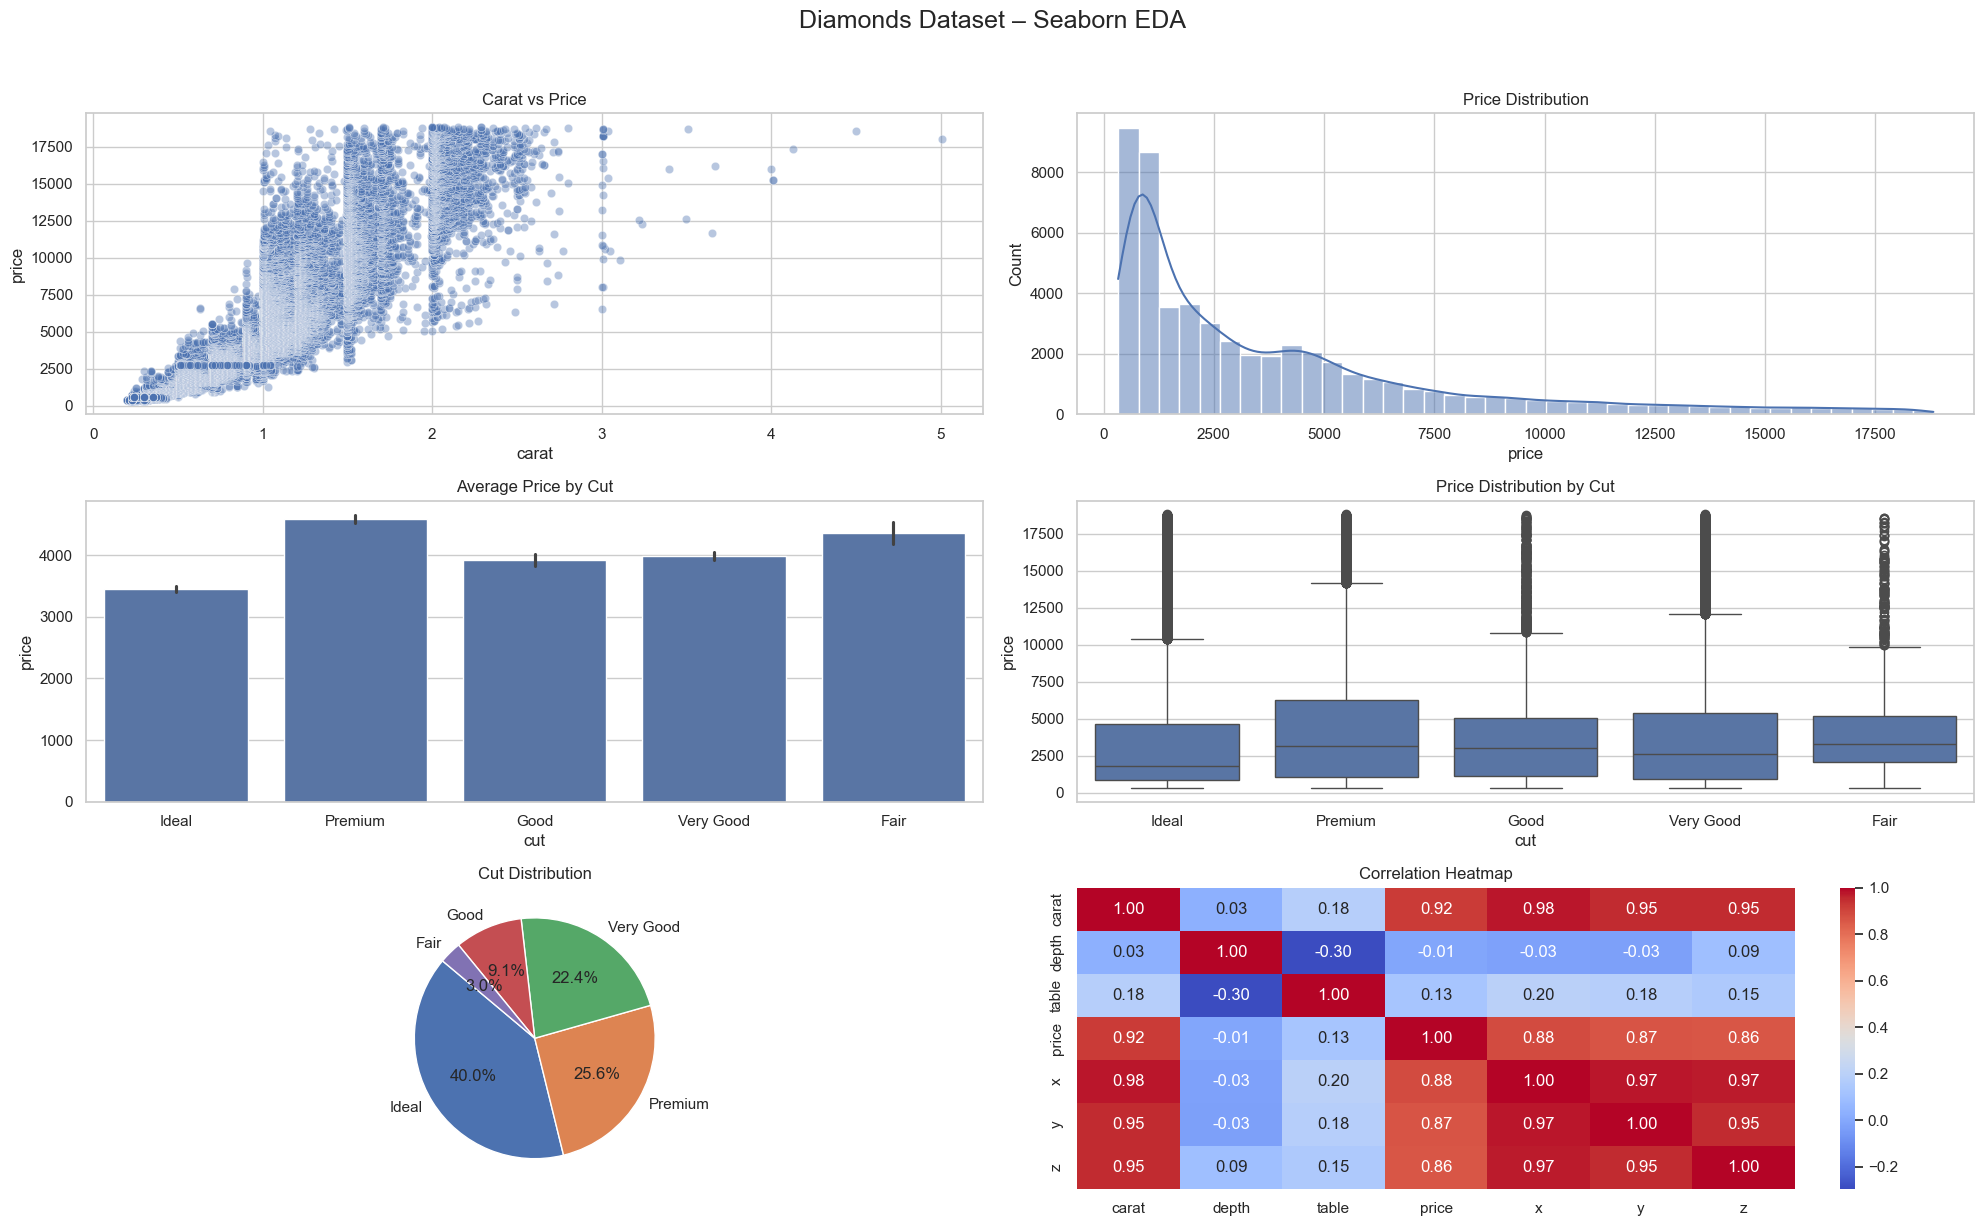

In [19]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 12))
fig.suptitle("Diamonds Dataset – Seaborn EDA", fontsize=18, y=1.02)

# 1️⃣ Scatter plot: Carat vs Price
sns.scatterplot(data=df, x="carat", y="price", alpha=0.4, ax=axes[0, 0])
axes[0, 0].set_title("Carat vs Price")

# 2️⃣ Histogram: Price Distribution
sns.histplot(data=df, x="price", bins=40, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Price Distribution")

# 3️⃣ Bar plot: Average Price by Cut
sns.barplot(data=df, x="cut", y="price", estimator="mean", ax=axes[1, 0])
axes[1, 0].set_title("Average Price by Cut")

# 4️⃣ Box plot: Price by Cut
sns.boxplot(data=df, x="cut", y="price", ax=axes[1, 1])
axes[1, 1].set_title("Price Distribution by Cut")

# 5️⃣ Pie chart: Cut Distribution
cut_counts = df["cut"].value_counts()
axes[2, 0].pie(
    cut_counts,
    labels=cut_counts.index,
    autopct="%1.1f%%",
    startangle=140
)
axes[2, 0].set_title("Cut Distribution")

# 6️⃣ Correlation Heatmap
corr = df[["carat","depth","table","price","x","y","z"]].corr()
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    ax=axes[2, 1]
)
axes[2, 1].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()


C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\1662928391.py:26: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\1662928391.py:26: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


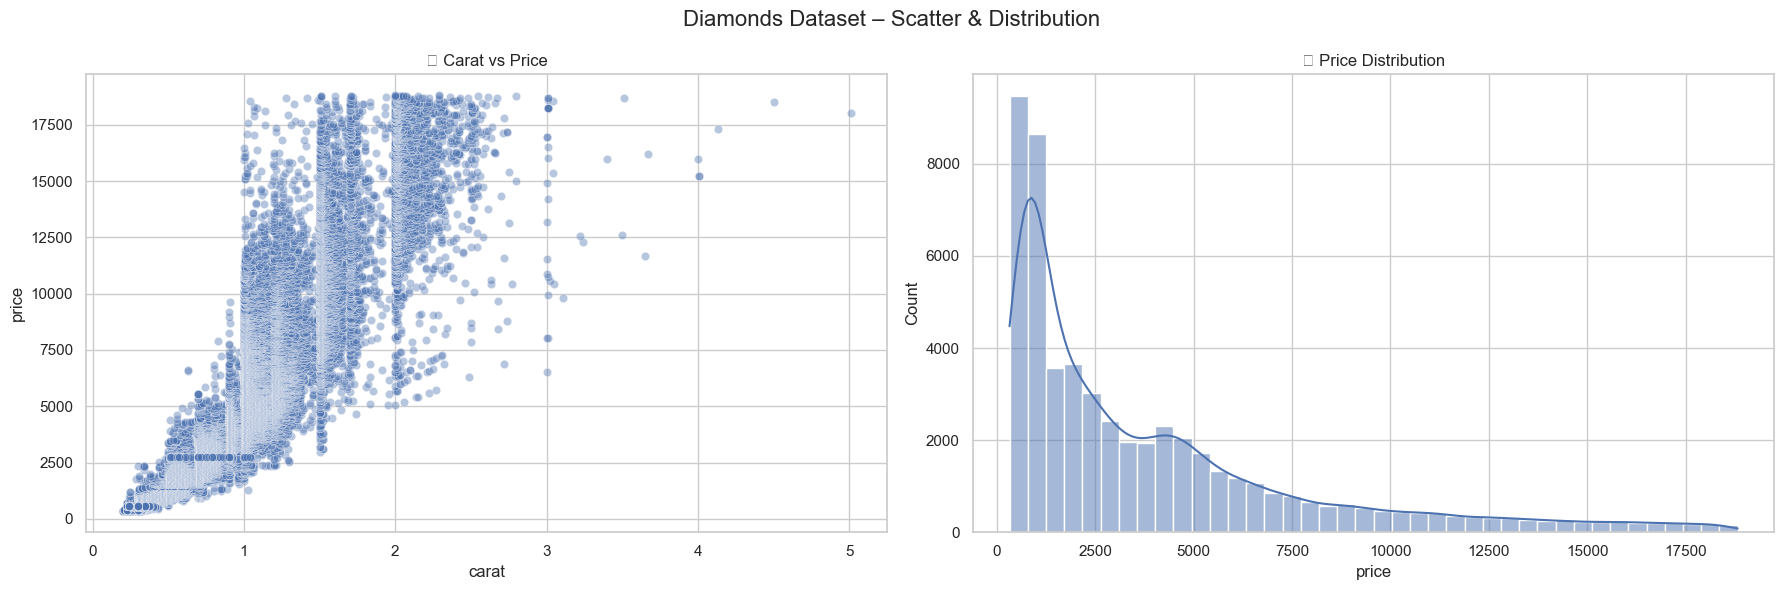

C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\1662928391.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\1662928391.py:43: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


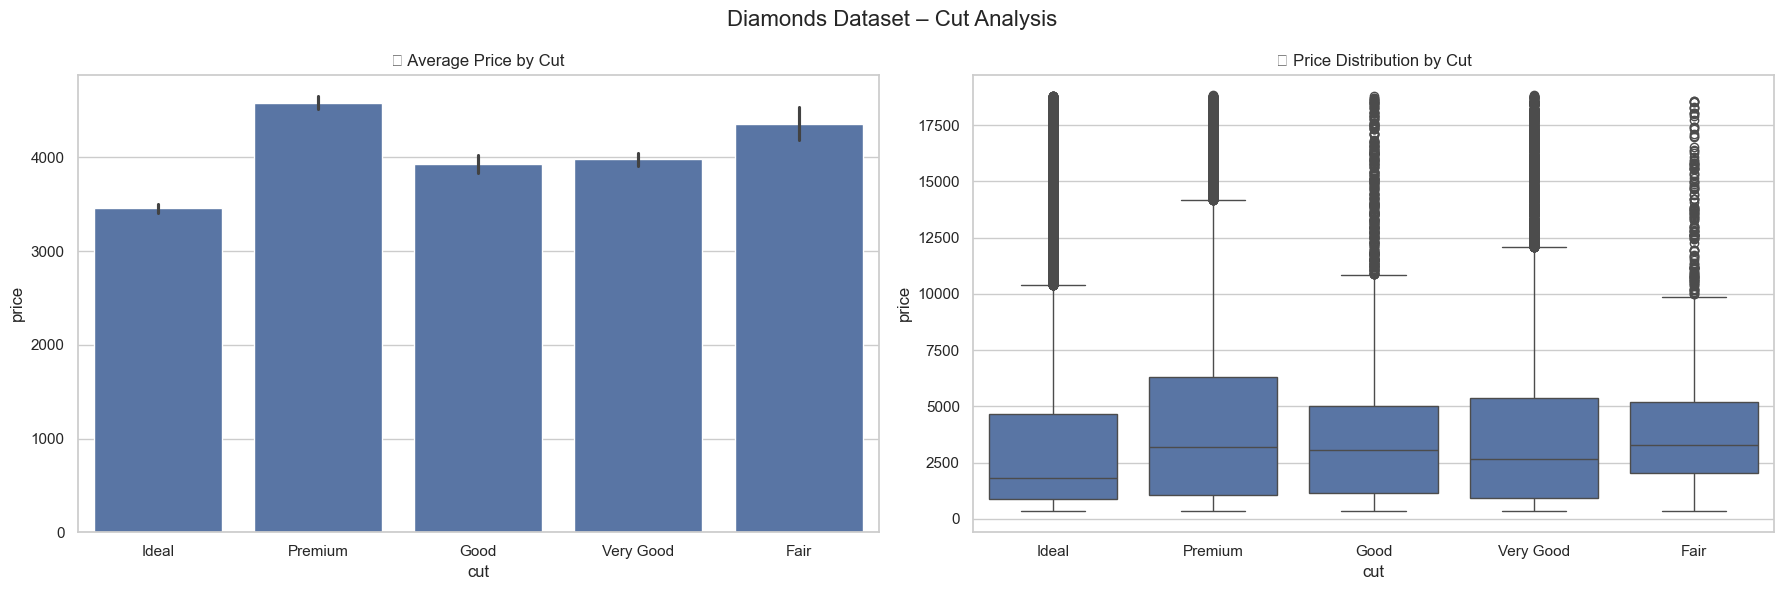

C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\1662928391.py:62: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


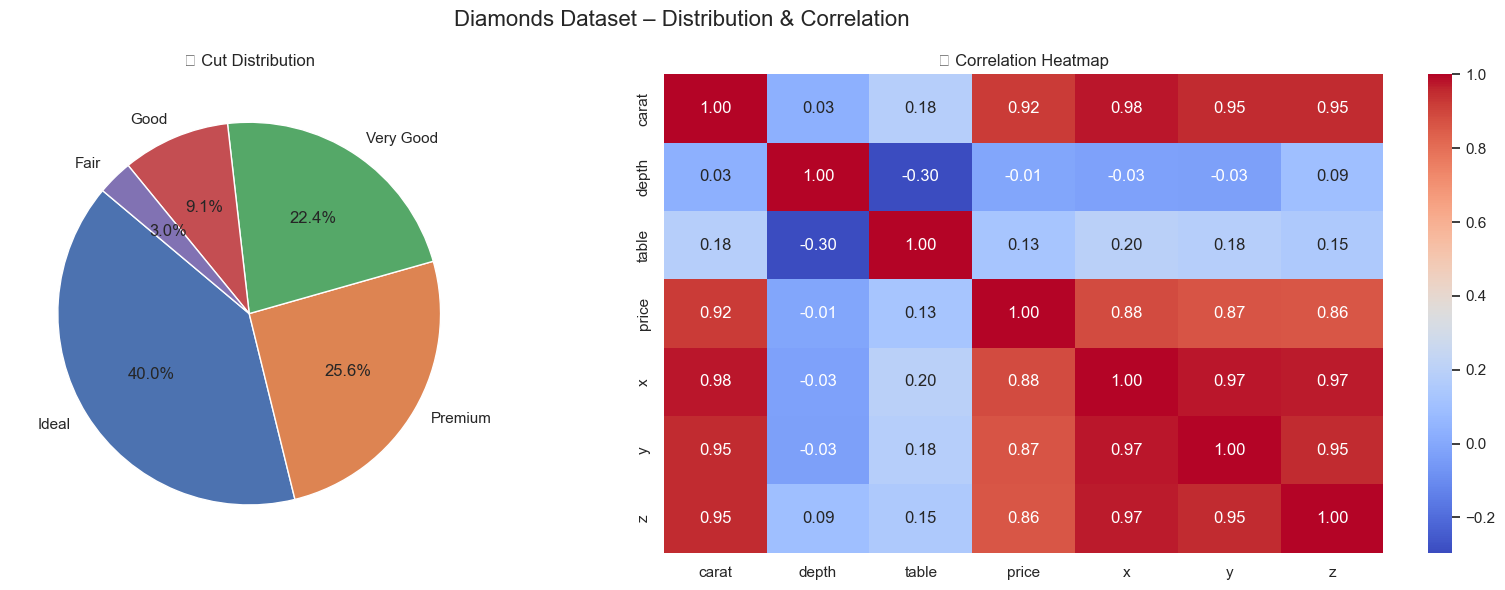

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
df = pd.read_csv(url)

# Set seaborn style
sns.set_theme(style="whitegrid")

# ==============================
# 1️⃣ Figure 1: Scatter + Histogram
# ==============================
fig1, axes1 = plt.subplots(1, 2, figsize=(18, 6))
fig1.suptitle("Diamonds Dataset – Scatter & Distribution", fontsize=16)

# Scatter: Carat vs Price
sns.scatterplot(data=df, x="carat", y="price", alpha=0.4, ax=axes1[0])
axes1[0].set_title("💎 Carat vs Price")

# Histogram: Price Distribution
sns.histplot(data=df, x="price", bins=40, kde=True, ax=axes1[1])
axes1[1].set_title("💰 Price Distribution")

plt.tight_layout()
plt.show()

# ==============================
# 2️⃣ Figure 2: Bar Plot + Box Plot
# ==============================
fig2, axes2 = plt.subplots(1, 2, figsize=(18, 6))
fig2.suptitle("Diamonds Dataset – Cut Analysis", fontsize=16)

# Bar plot: Average Price by Cut
sns.barplot(data=df, x="cut", y="price", estimator="mean", ax=axes2[0])
axes2[0].set_title("📊 Average Price by Cut")

# Box plot: Price by Cut
sns.boxplot(data=df, x="cut", y="price", ax=axes2[1])
axes2[1].set_title("📦 Price Distribution by Cut")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Figure 3: Pie Chart + Correlation Heatmap
# ==============================
fig3, axes3 = plt.subplots(1, 2, figsize=(18, 6))
fig3.suptitle("Diamonds Dataset – Distribution & Correlation", fontsize=16)

# Pie chart: Cut Distribution
cut_counts = df["cut"].value_counts()
axes3[0].pie(cut_counts, labels=cut_counts.index, autopct="%1.1f%%", startangle=140)
axes3[0].set_title("🥧 Cut Distribution")

# Correlation Heatmap
corr = df[["carat","depth","table","price","x","y","z"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes3[1])
axes3[1].set_title("📈 Correlation Heatmap")

plt.tight_layout()
plt.show()


C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\2362119148.py:30: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


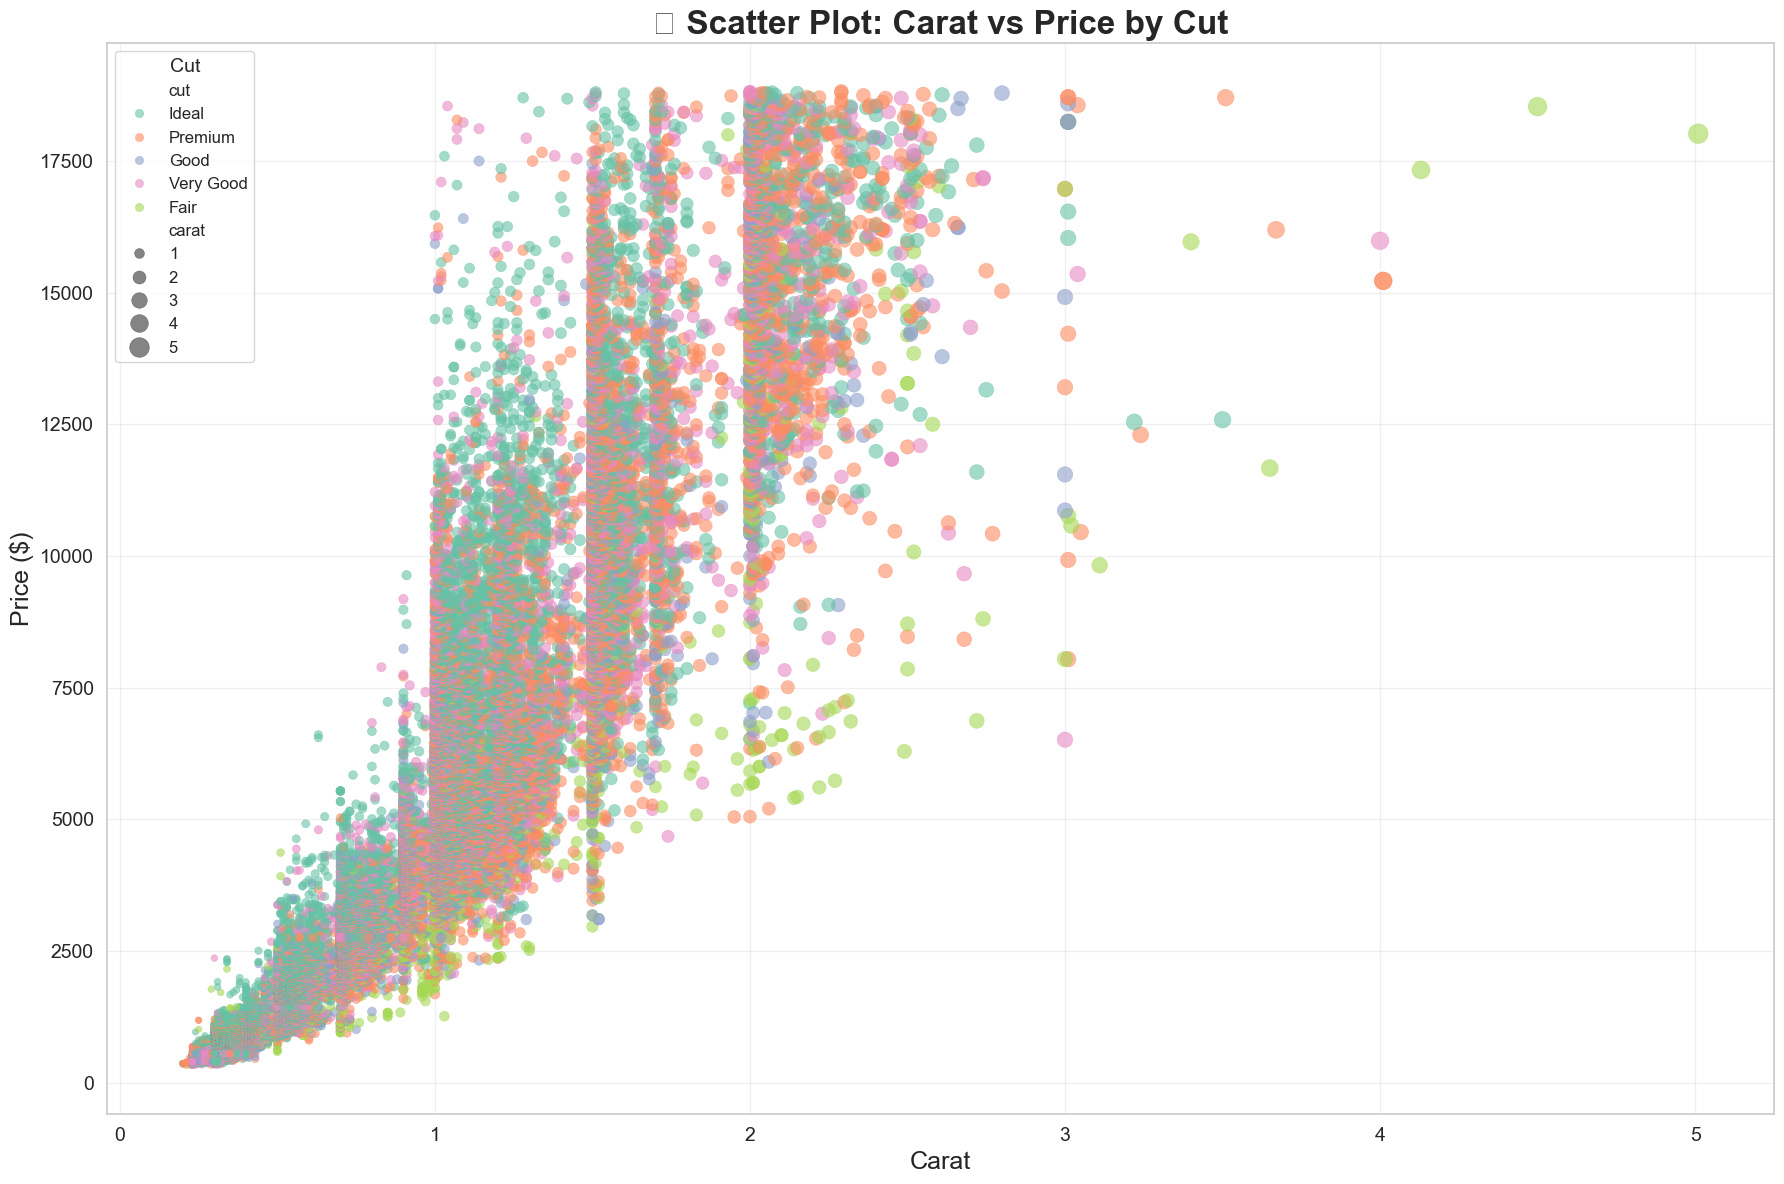

In [21]:
# ==============================
# 🎨 Scatter Plot: Carat vs Price
# ==============================
plt.figure(figsize=(18, 12))

# Seaborn scatterplot with better style
sns.scatterplot(
    data=df,
    x="carat",
    y="price",
    hue="cut",          # Optional: color by 'cut'
    palette="Set2",     # Nice color palette
    size="carat",       # Dot size reflects carat weight
    sizes=(20, 200),    # Range of dot sizes
    alpha=0.6,          # Transparency
    edgecolor=None      # Removes dot borders for cleaner look
)

# Titles and labels
plt.title("💎 Scatter Plot: Carat vs Price by Cut", fontsize=24, weight='bold')
plt.xlabel("Carat", fontsize=18)
plt.ylabel("Price ($)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, alpha=0.3)

# Legend adjustments
plt.legend(title="Cut", title_fontsize=14, fontsize=12, loc="upper left")

plt.tight_layout()
plt.show()

# ⭐: Seaborn (Line_Plot)

C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\3402950437.py:26: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


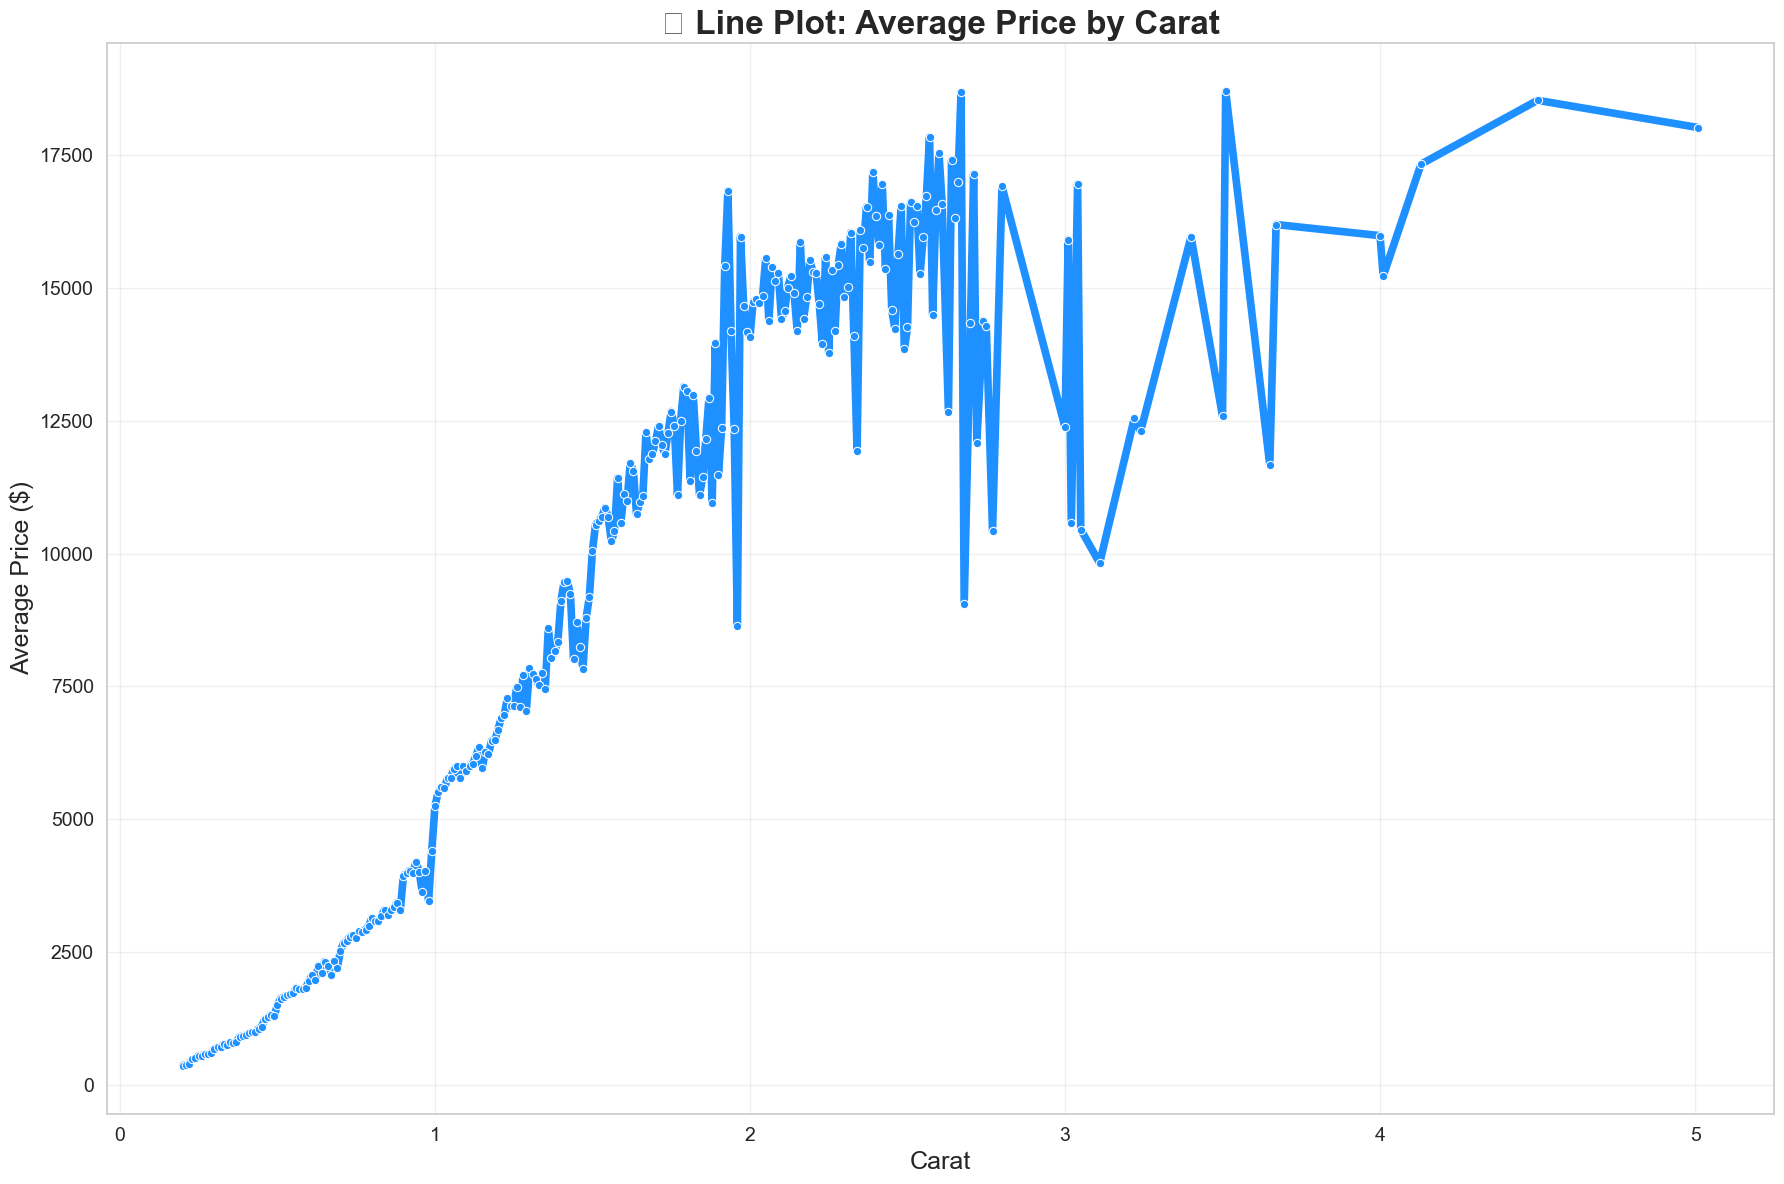

In [22]:
# ==============================
# 🎨 Line Plot: Average Price by Carat
# ==============================
# Aggregate data: average price per carat (rounded for clarity)
df_line = df.groupby('carat', as_index=False)['price'].mean()

plt.figure(figsize=(18, 12))

sns.lineplot(
    data=df_line,
    x='carat',
    y='price',
    marker='o',          # Adds dots at each data point
    color='dodgerblue',  # Line color
    linewidth=5.5        # Line thickness
)

# Titles and labels
plt.title("💎 Line Plot: Average Price by Carat", fontsize=24, weight='bold')
plt.xlabel("Carat", fontsize=18)
plt.ylabel("Average Price ($)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ⭐: Seaborn (Line_Plot)

C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\3628018352.py:27: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


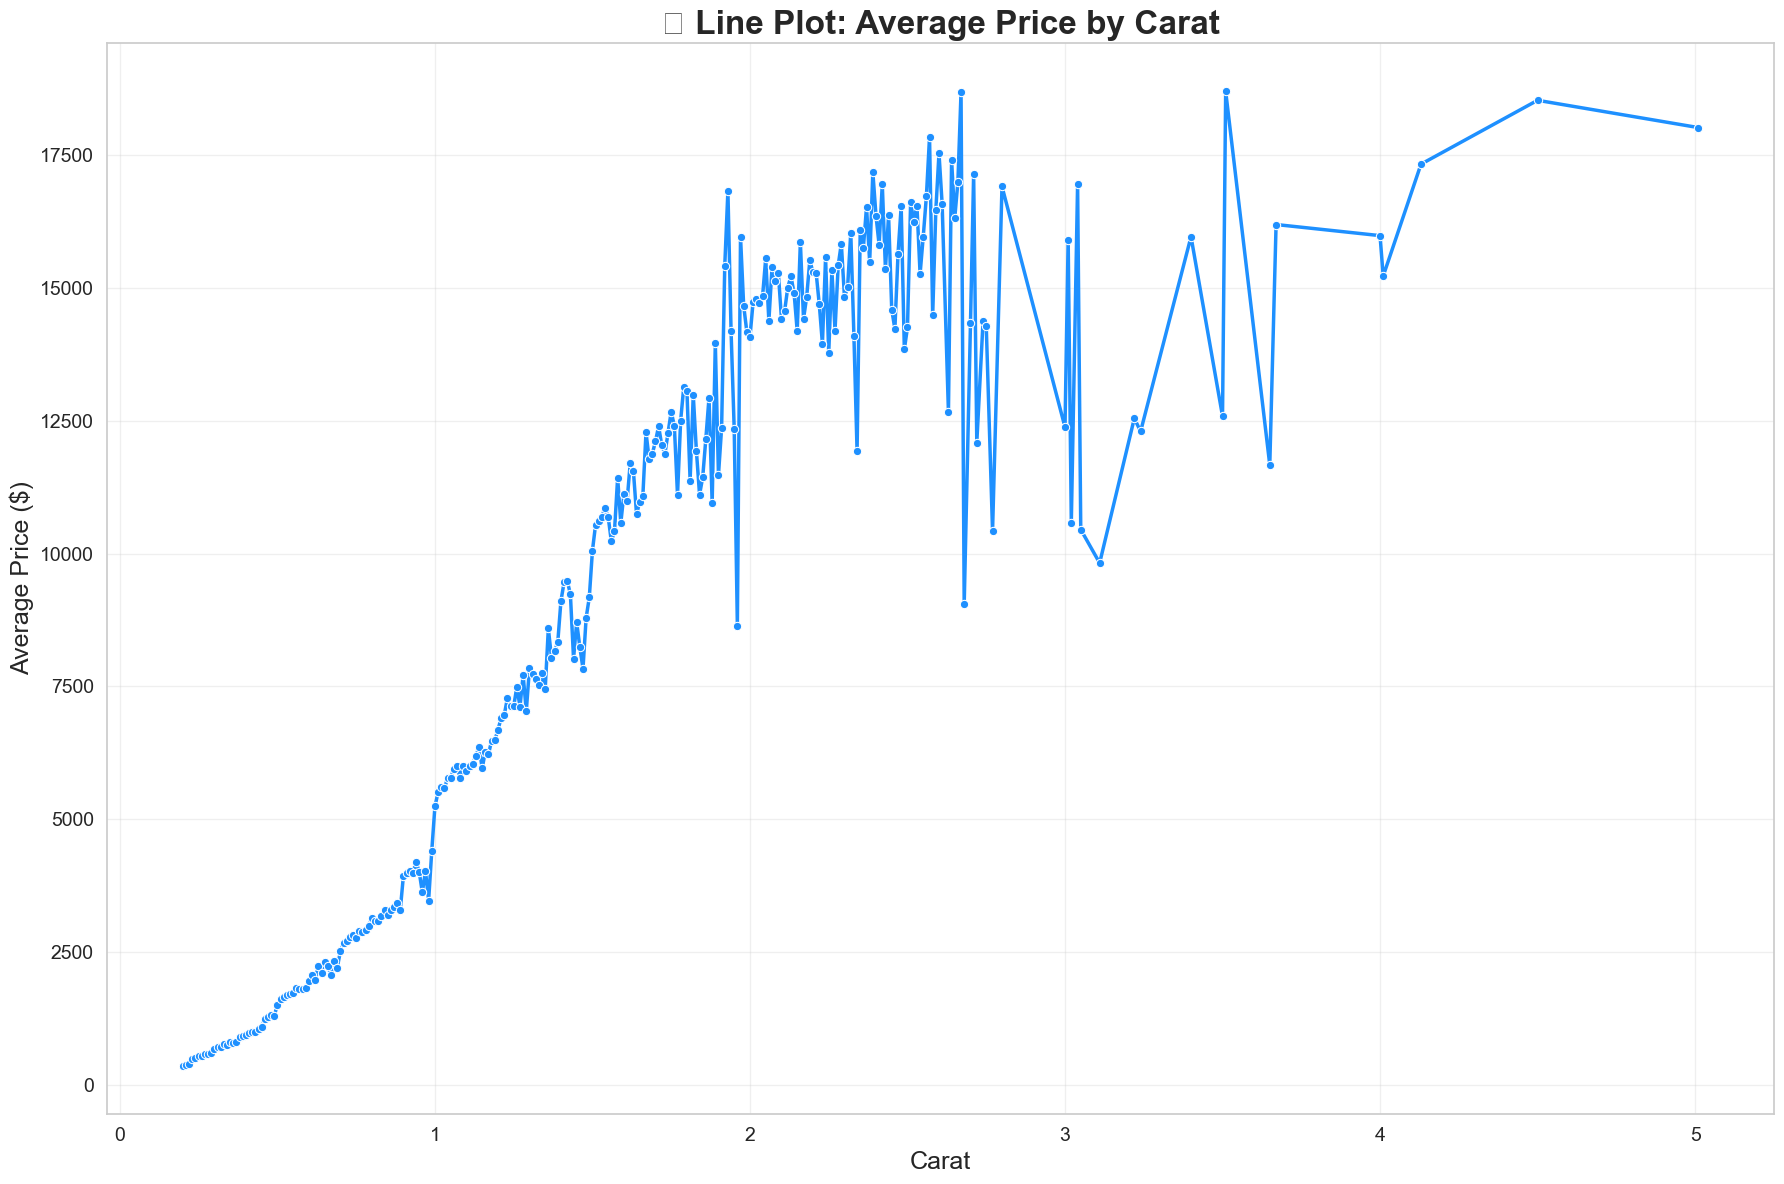

In [23]:
# ==============================
# 🎨 Line Plot: Average Price by Carat
# ==============================
# Aggregate data: average price per carat (rounded for clarity)
df_line = df.groupby('carat', as_index=False)['price'].mean()

plt.figure(figsize=(18, 12))

sns.lineplot(
    data=df_line,
    x='carat',
    y='price',
    marker='o',          # Adds dots at each data point
    color='dodgerblue',  # Line color
    linewidth=2.5  ,      # Line thickness
    # hue="cut"
)

# Titles and labels
plt.title("💎 Line Plot: Average Price by Carat", fontsize=24, weight='bold')
plt.xlabel("Carat", fontsize=18)
plt.ylabel("Average Price ($)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ⭐: Seaborn (Line_Plot)

C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\3244549917.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_ar

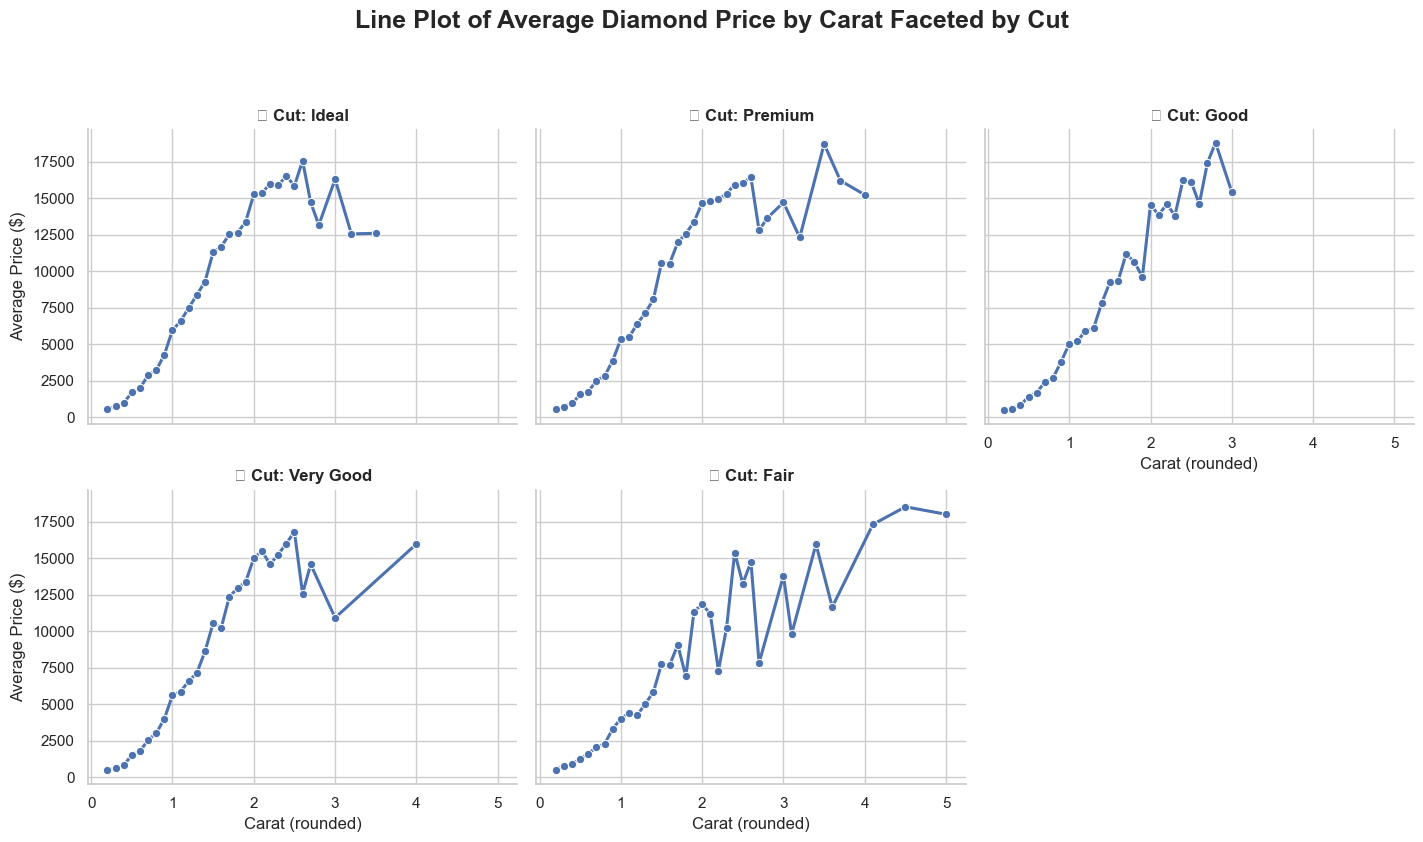

In [24]:
# seaborn line plot with facets based  on "cut" column

# Round carat for smoother line plots
df['carat_round'] = df['carat'].round(1)

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create facet line plot
g = sns.relplot(
    data=df,
    x="carat_round",
    y="price",
    kind="line",
    col="cut",             # Facet by 'cut'
    col_wrap=3,            # Wrap into 3 columns
    ci=None,               # Remove confidence interval for clarity
    marker="o",            # Dot markers
    linewidth=2.2,         # Thicker lines for visibility
    markersize=6,          # Marker size
    palette="Set2",        # Nice color palette
    height=4,
    aspect=1.2
)

# Titles and labels
g.set_titles("💎 Cut: {col_name}", fontsize=14, weight='bold')
g.set_axis_labels("Carat (rounded)", "Average Price ($)")
g.fig.suptitle(
    "Line Plot of Average Diamond Price by Carat Faceted by Cut",
    fontsize=18,
    weight='bold',
    y=1.05
)

# Adjust layout
plt.tight_layout()
plt.show()


# ⭐: Seaborn (Box_Plot)

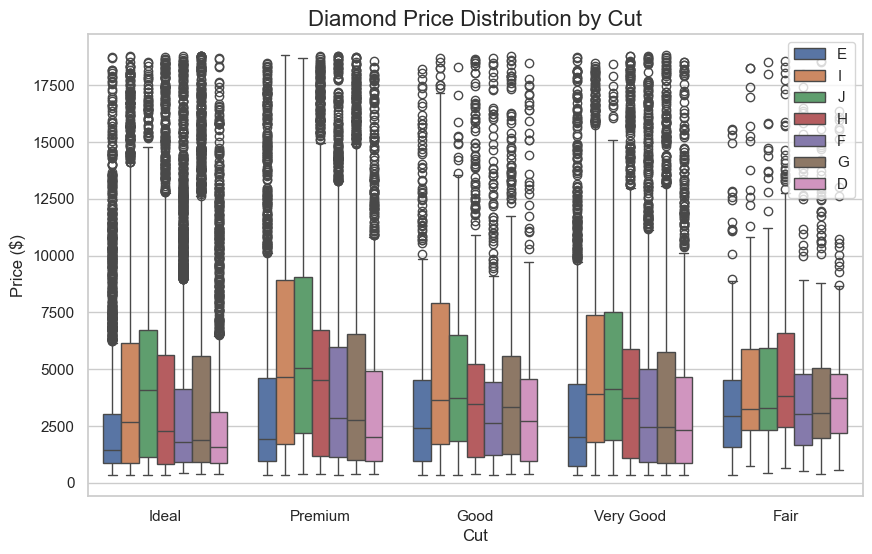

In [25]:
# Seaborn style
sns.set_theme(style="whitegrid")

# Box plot: Price by Cut
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="cut", y="price", hue="color")
plt.title("Diamond Price Distribution by Cut", fontsize=16)
plt.xlabel("Cut")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\2154919882.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cut", y="price", palette="Set2")


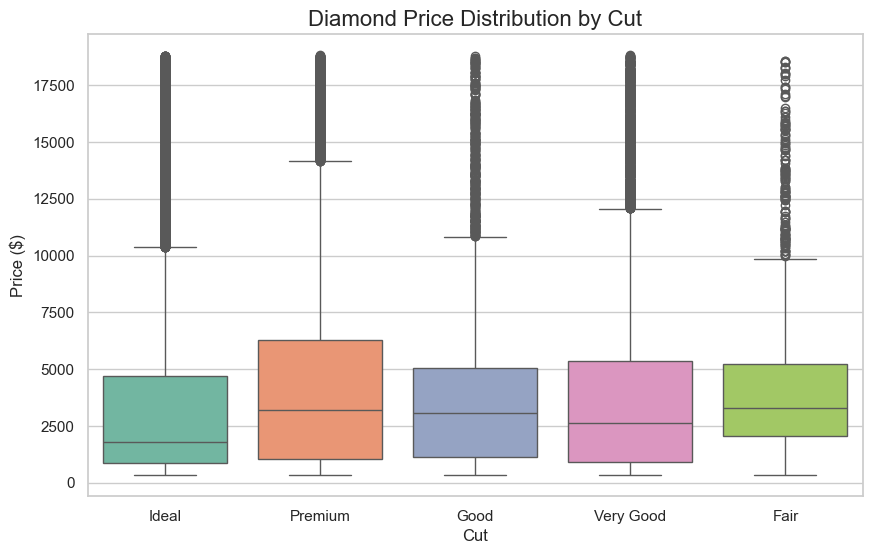

In [26]:
# Seaborn style
sns.set_theme(style="whitegrid")

# Box plot: Price by Cut
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="cut", y="price", palette="Set2")
plt.title("Diamond Price Distribution by Cut", fontsize=16)
plt.xlabel("Cut")
plt.ylabel("Price ($)")
plt.show()

# ⭐: Seaborn (Violin_plot)

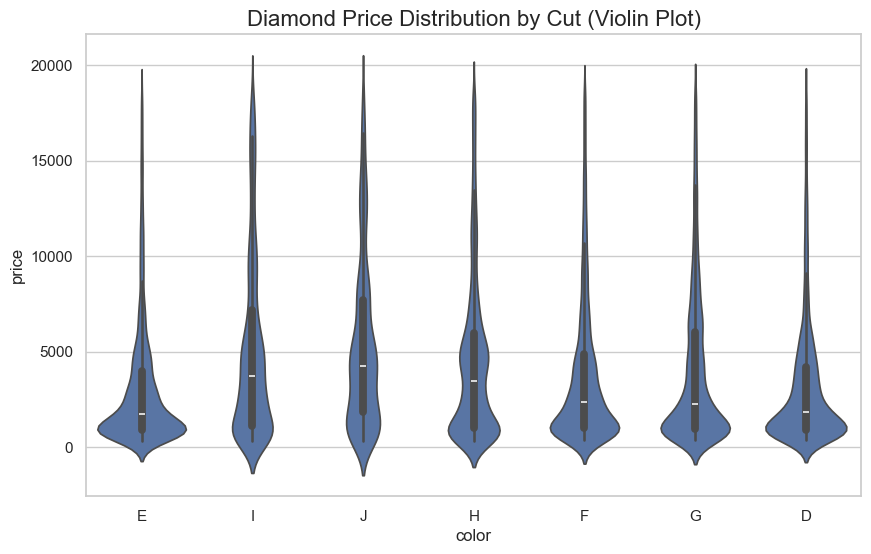

In [27]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x="color",y="price")
plt.title("Diamond Price Distribution by Cut (Violin Plot)", fontsize=16)
plt.show()

C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\2811522755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="cut", y="price", palette="Set3", inner="quartile")


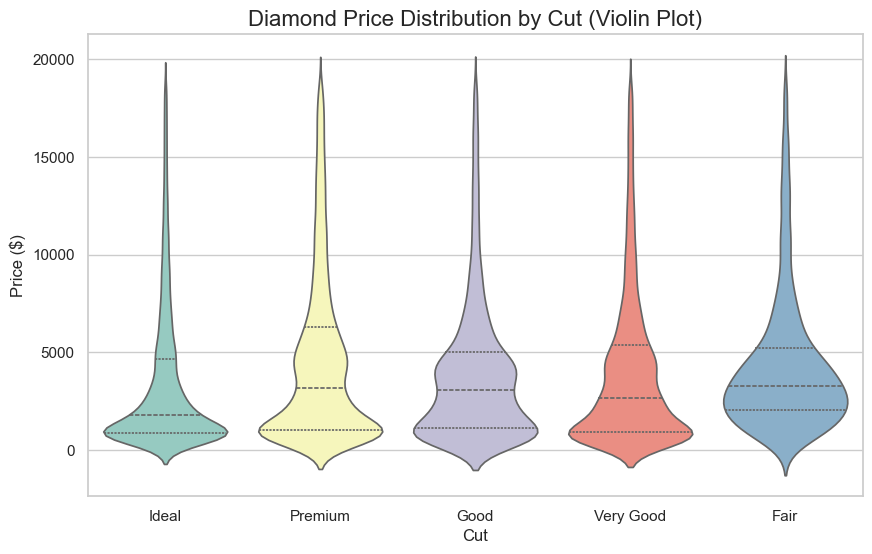

In [28]:
# Violin plot: Price by Cut
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="cut", y="price", palette="Set3", inner="quartile")
plt.title("Diamond Price Distribution by Cut (Violin Plot)", fontsize=16)
plt.xlabel("Cut")
plt.ylabel("Price ($)")
plt.show()

# ⭐: Seaborn (Count_plot)

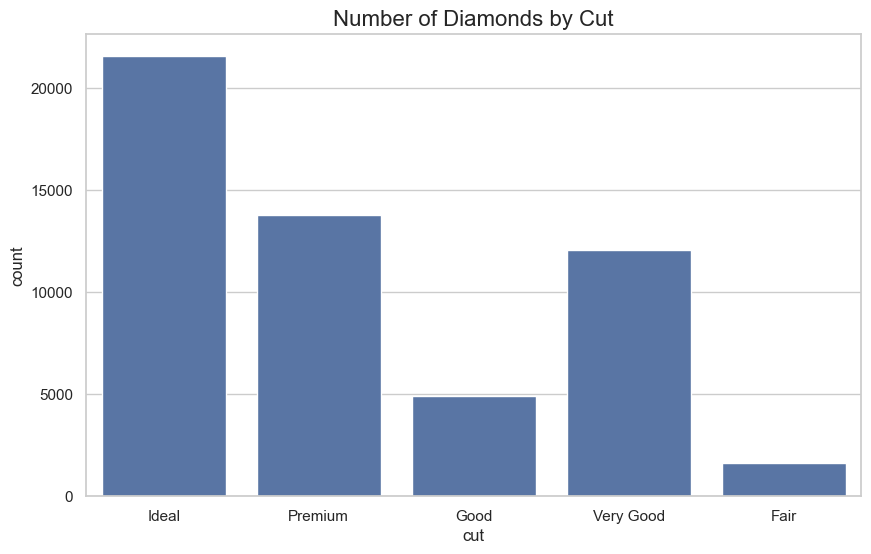

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="cut")
plt.title("Number of Diamonds by Cut", fontsize=16)
plt.show()

C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\2834298970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="cut", palette="pastel", order=df['cut'].value_counts().index)


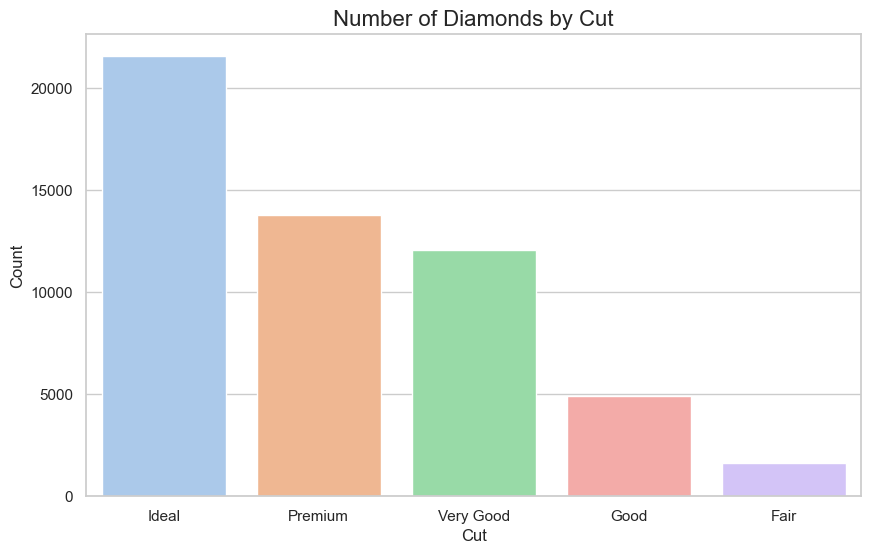

In [30]:
# Count plot: Number of diamonds per cut
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="cut", palette="pastel", order=df['cut'].value_counts().index)
plt.title("Number of Diamonds by Cut", fontsize=16)
plt.xlabel("Cut")
plt.ylabel("Count")
plt.show()

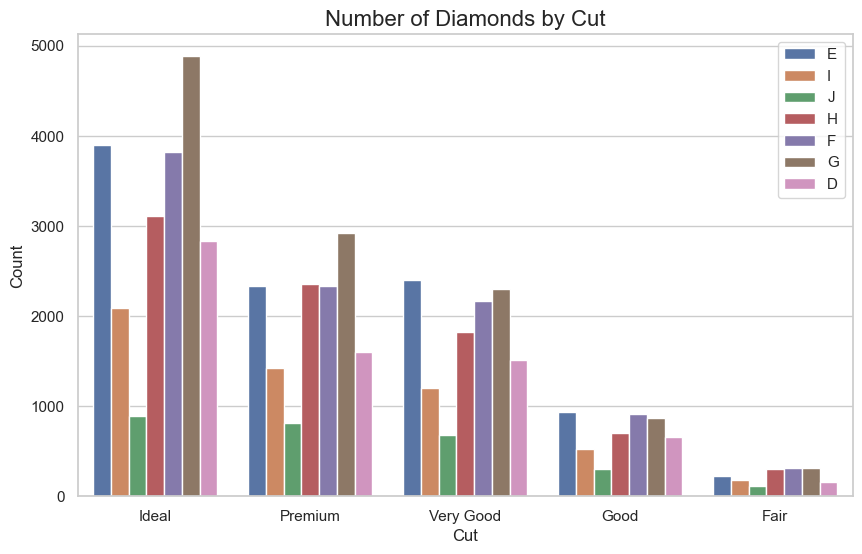

In [31]:
# Count plot: Number of diamonds per cut
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="cut", hue="color", order=df['cut'].value_counts().index)
plt.title("Number of Diamonds by Cut", fontsize=16)
plt.xlabel("Cut")
plt.ylabel("Count")
plt.legend()
plt.show()

# ⭐: Seaborn (Heatmap)

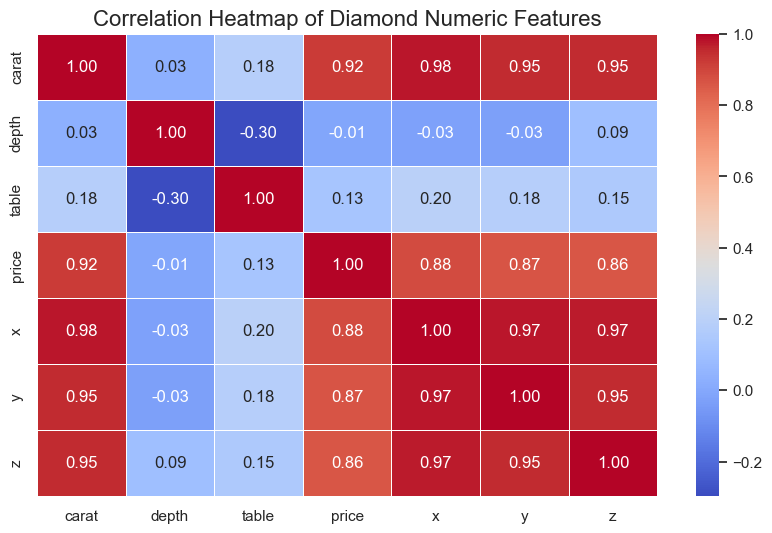

In [32]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Diamond Numeric Features", fontsize=16)
plt.show()

# ⭐: Seaborn (Pair_Plot)

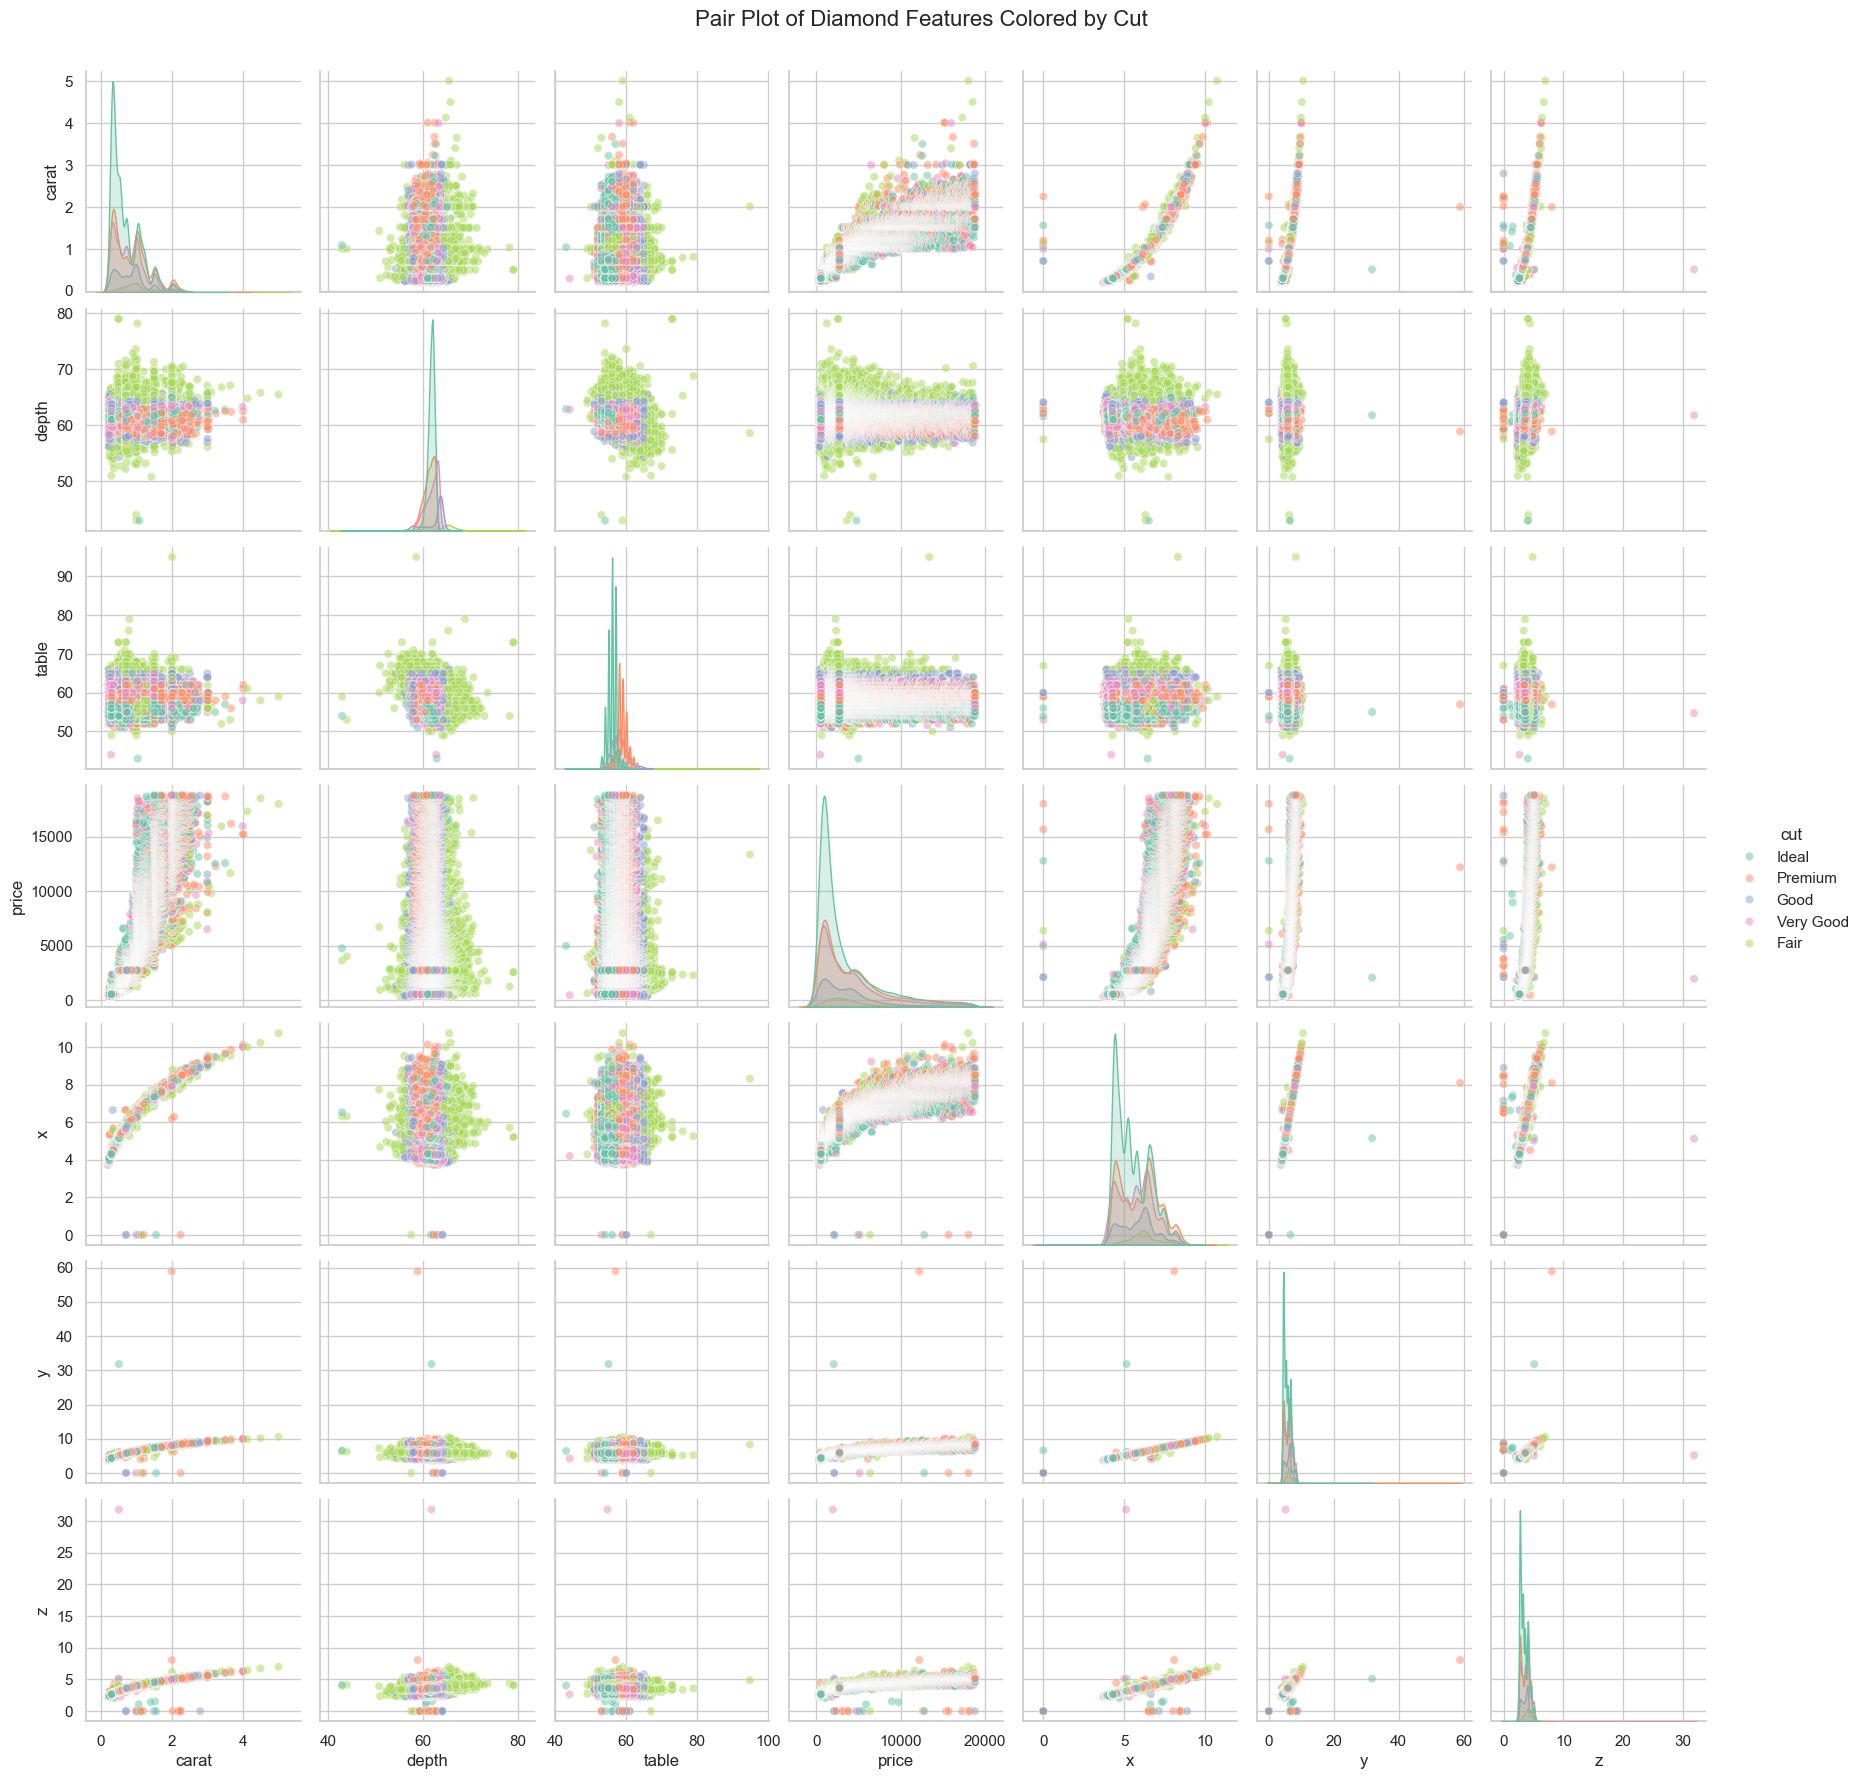

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
df = pd.read_csv(url)

# Select numeric features for pair plot
numeric_features = ["carat", "depth", "table", "price", "x", "y", "z"]

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Pair plot
sns.pairplot(df[numeric_features + ["cut"]], hue="cut", palette="Set2", diag_kind="kde", plot_kws={"alpha":0.5})
plt.suptitle("Pair Plot of Diamond Features Colored by Cut", fontsize=16, y=1.02)
plt.show()


# ⭐: Seaborn (FacetGrid)

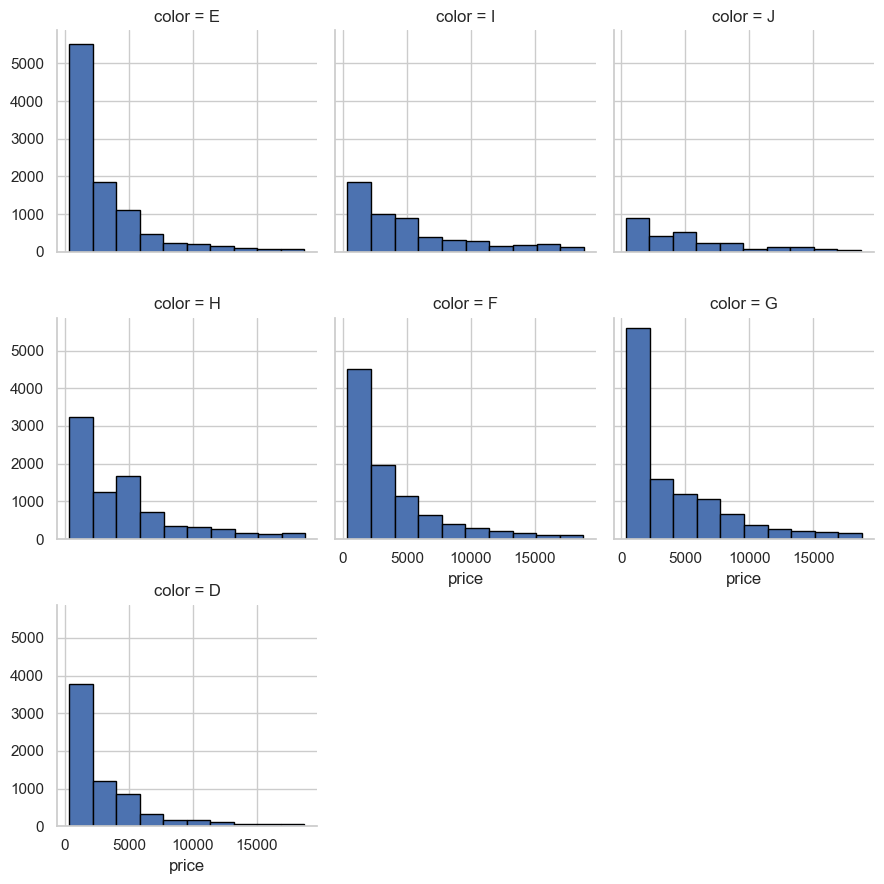

In [34]:
g = sns.FacetGrid(df,col = "color",col_wrap=3)
g.map(plt.hist,"price",bins = 10, edgecolor = "black")
plt.show()

C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `e

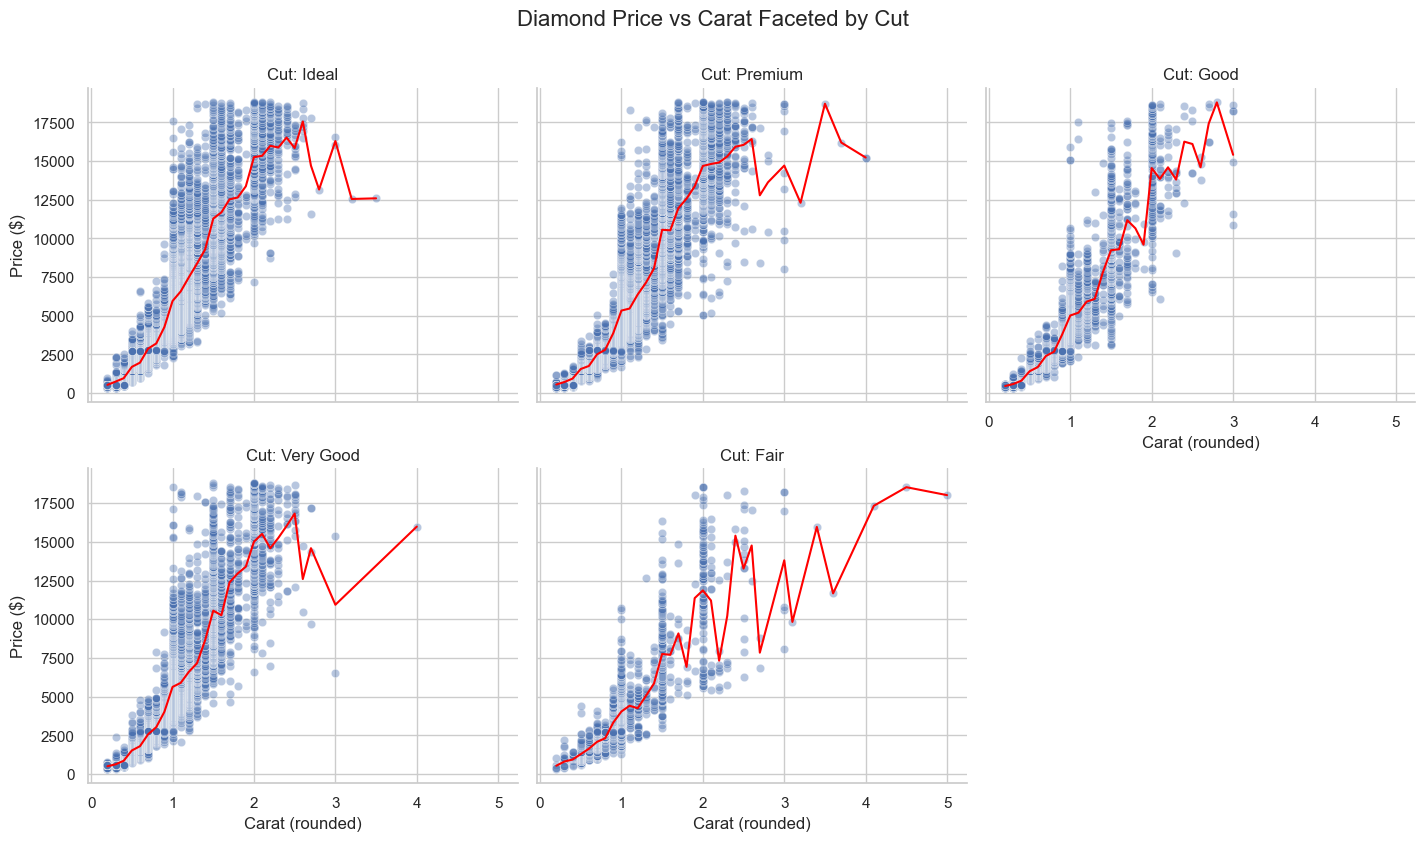

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
df = pd.read_csv(url)

# Round carat for cleaner plots
df['carat_round'] = df['carat'].round(1)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create FacetGrid: Price vs Carat faceted by Cut
g = sns.FacetGrid(df, col="cut", col_wrap=3, height=4, aspect=1.2)
g.map(sns.scatterplot, "carat_round", "price", alpha=0.4)
g.map(sns.lineplot, "carat_round", "price", ci=None, estimator="mean", color="red")

g.set_axis_labels("Carat (rounded)", "Price ($)")
g.set_titles("Cut: {col_name}")
g.fig.suptitle("Diamond Price vs Carat Faceted by Cut", fontsize=16, y=1.05)

plt.show()


⭐: # Look  # Size

In [36]:
# ==============================
# 🎨 Seaborn Styling & Context
# ==============================
# #EDA #DataVisualization #Seaborn #Matplotlib
# #MachineLearning #DataScience #Kaggle
# #NotebookContext #CleanPlots #WhiteGrid

import seaborn as sns

# Set plot appearance (background + grid)
sns.set_style("whitegrid")      # #CleanUI #ReadableCharts

# Set scaling for notebook usage
sns.set_context("notebook")     # #NotebookContext #EDA #MLWorkflow


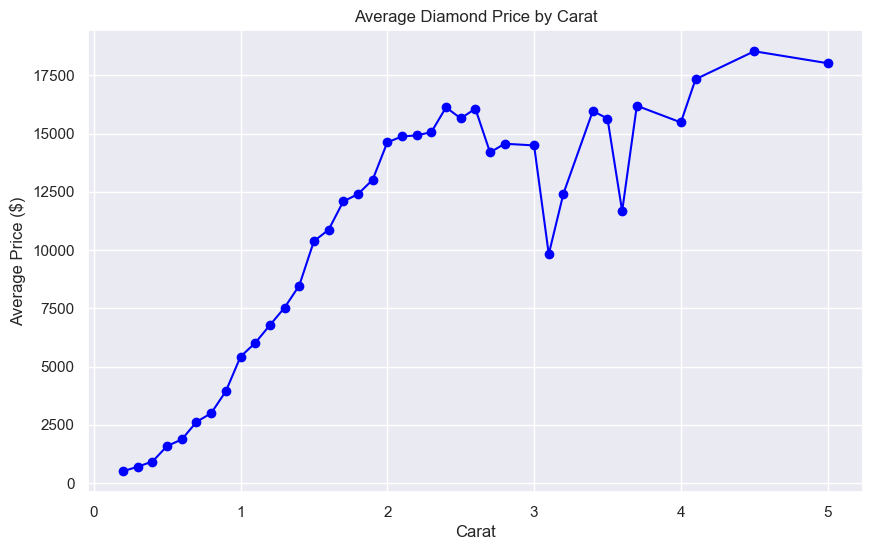

In [37]:
# 🌑 Dark style (simple)
sns.set_style("darkgrid")
sns.set_context("notebook")

# Line plot
plt.figure(figsize=(10,6))
plt.plot(avg_price.index, avg_price.values, marker='o', color='blue')
plt.title('Average Diamond Price by Carat')
plt.xlabel('Carat')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()


# ⭐:Global font size

C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\4158365173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cut", y="price", palette="Set2")


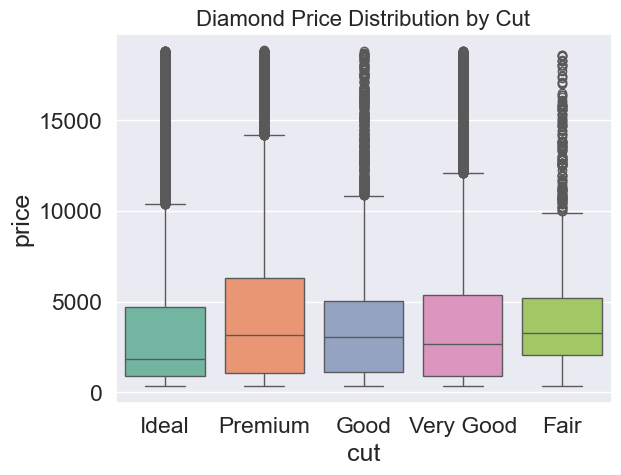

In [38]:
sns.set_context("notebook", font_scale=1.5)
sns.boxplot(data=df, x="cut", y="price", palette="Set2")
plt.title("Diamond Price Distribution by Cut", fontsize=16)
plt.show()

## ⭐: Color Platte

C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


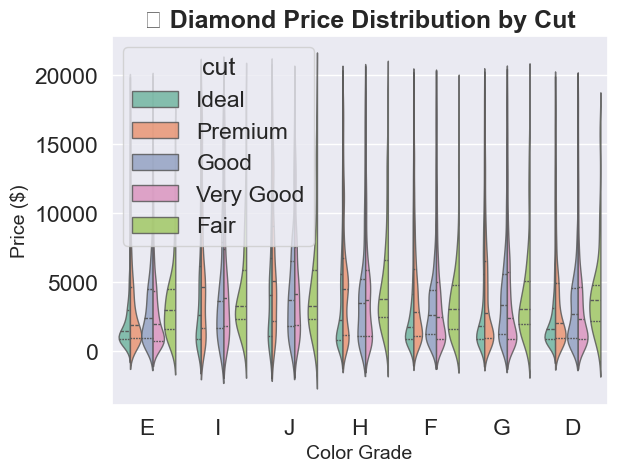

In [39]:
# Color palette
sns.set_palette("Set2")  # try: Set3, pastel, muted, bright, dark, colorblind

# Violin plot
sns.violinplot(
    data=df,
    x="color",
    y="price",
    hue="cut",
    split=True,
    inner="quartile",     # shows Q1, median, Q3
    linewidth=1,
    alpha=0.85
)

# Titles & labels
plt.title("💎 Diamond Price Distribution by Cut", fontsize=18, weight="bold")
plt.xlabel("Color Grade", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)
plt.show()


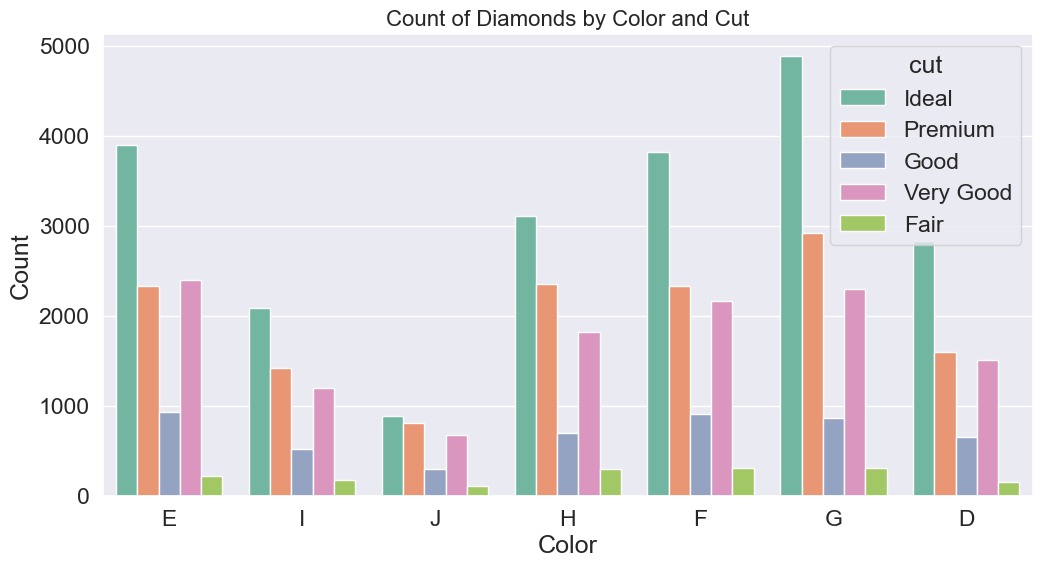

In [40]:
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")  # "Set3", "pastel", "muted", "bright", "dark", "colorblind"

# Count plot
sns.countplot(
    data=df,
    x="color",
    hue="cut"
)

plt.title("Count of Diamonds by Color and Cut", fontsize=16)
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

## ⭐: Grid lines

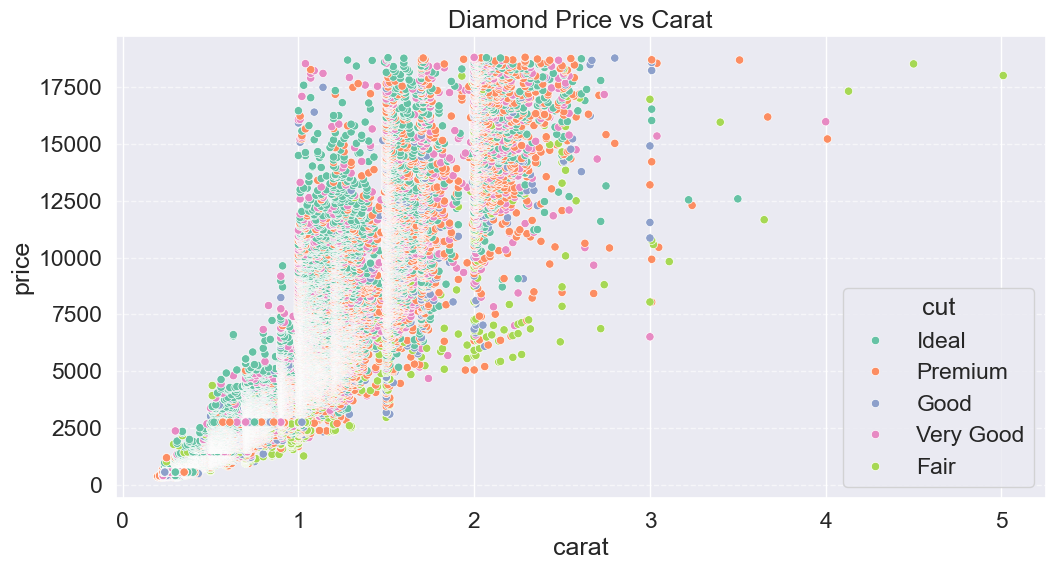

In [41]:
# Simple scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="carat", y="price", hue="cut")  # colored by 'cut'
plt.title("Diamond Price vs Carat")
sns.set_theme(style="whitegrid", context="talk")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


## ⭐: Remove the Top & Right Sides Spines

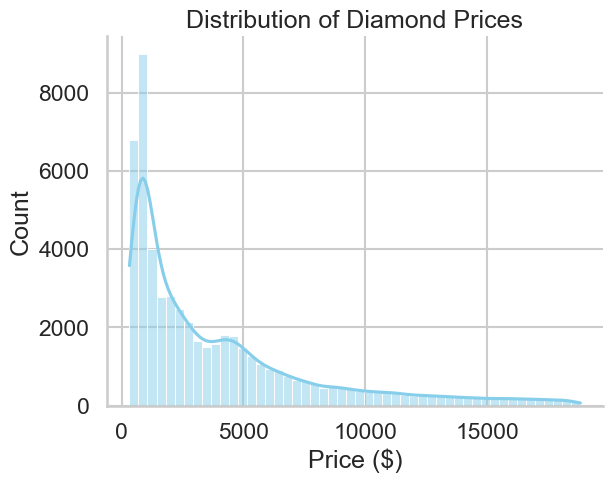

In [42]:
# Histogram of diamond prices
sns.histplot(data=df, x="price", bins=50, kde=True, color="skyblue")
sns.despine()
plt.title("Distribution of Diamond Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

## ⭐: Annotate

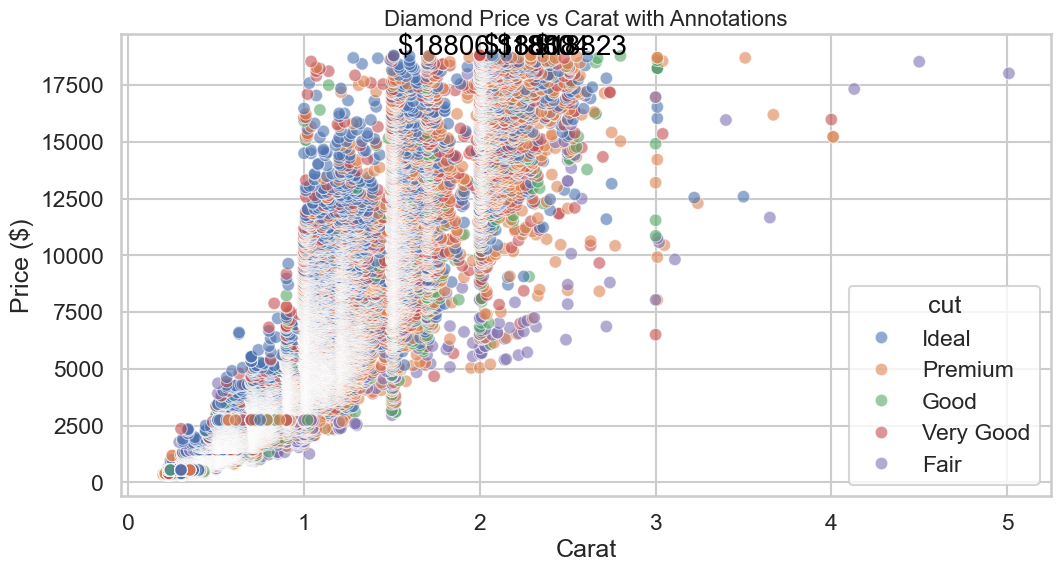

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="carat", y="price", hue="cut", alpha=0.6)

# Annotate top 5 most expensive diamonds
top5 = df.nlargest(5, "price")
for i, row in top5.iterrows():
    plt.text(
        row["carat"] + 0.02,  # slightly shift X
        row["price"],          # Y position
        f"${row['price']}",    # text
        fontsize=20,
        color="black"
    )

plt.title("Diamond Price vs Carat with Annotations", fontsize=16)
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.show()

## ⭐: Customizing the Legends

C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\2519705736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cut", y="price", palette="Set2")
C:\Users\iamus\AppData\Local\Temp\ipykernel_2780\2519705736.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:96: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\iamus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


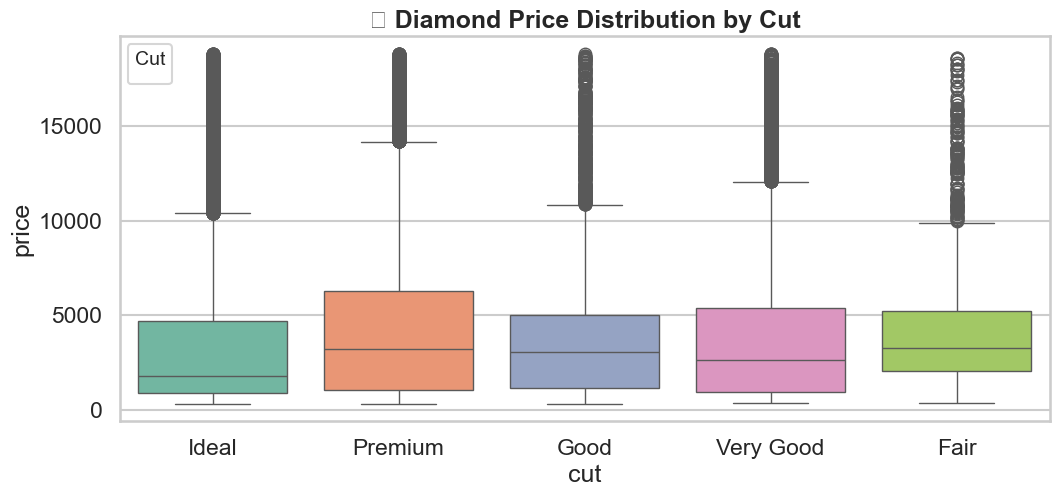

In [44]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="cut", y="price", palette="Set2")

# Titles & labels
plt.title("💎 Diamond Price Distribution by Cut", fontsize=18, weight="bold")
plt.legend(
    title="Cut",          # Legend title
    title_fontsize=14,    # Title font size
    fontsize=12,          # Labels font size
    loc="upper left",     # Legend position
    frameon=True,          # Show legend box
    bbox_to_anchor = (0, 1)  # Adjust legend position
)

## ⭐: FaceGrid of Multi_Hist

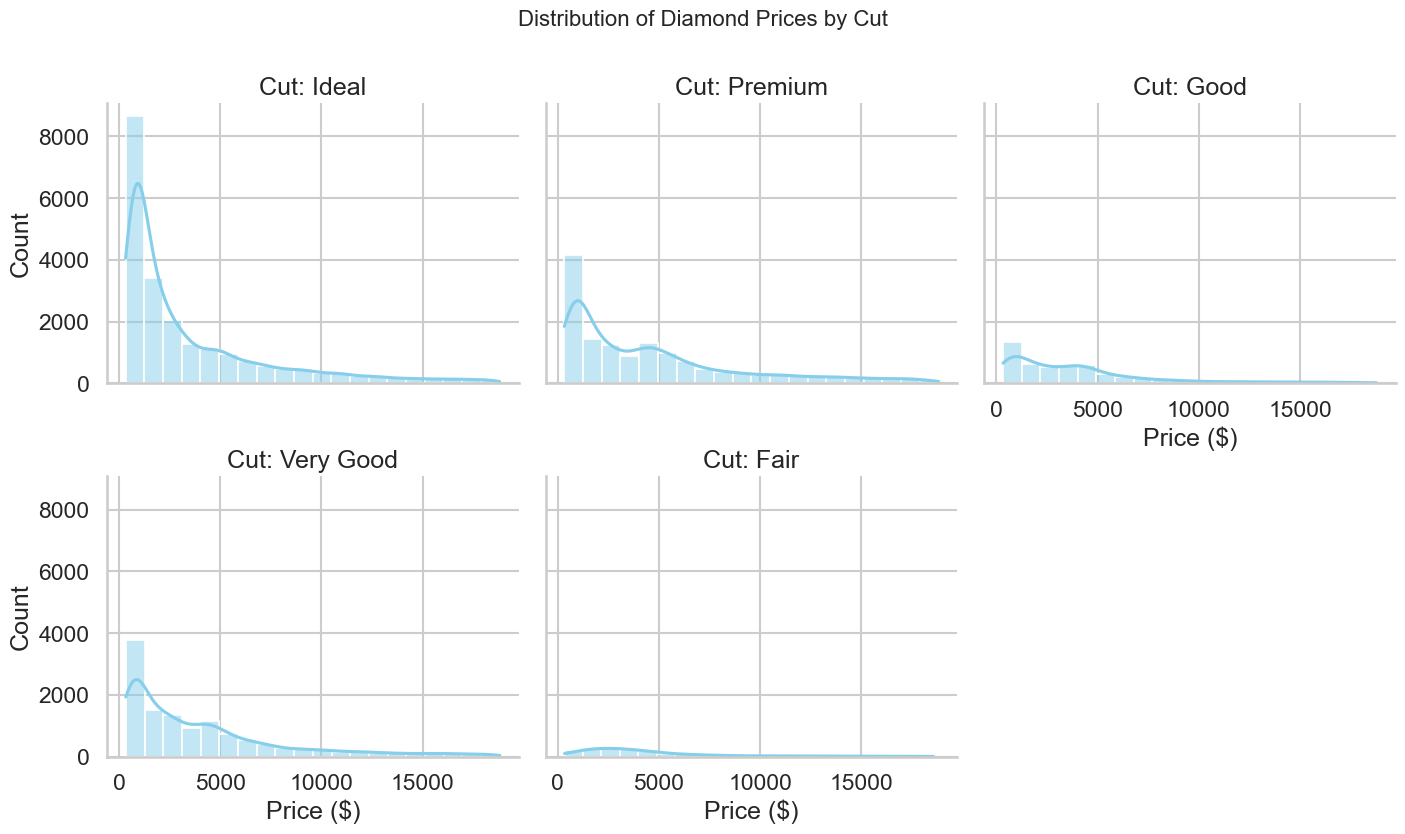

In [45]:
g = sns.FacetGrid(df, col="cut", col_wrap=3, height=4, aspect=1.2)
g.map(sns.histplot, "price", bins=20, kde=True, color="skyblue")
g.set_axis_labels("Price ($)", "Count")
g.set_titles("Cut: {col_name}")
g.fig.suptitle("Distribution of Diamond Prices by Cut", fontsize=16, y=1.05)
plt.show()

<Figure size 1200x600 with 0 Axes>

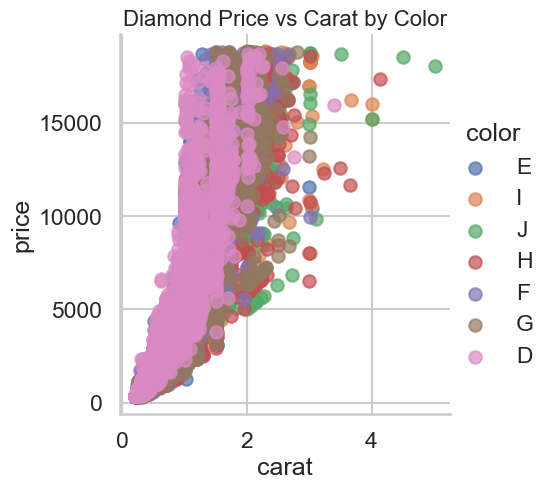

In [46]:
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, hue="color", height=5)
g.map(plt.scatter, "carat", "price", alpha=0.7).add_legend()
plt.title("Diamond Price vs Carat by Color",fontsize = 16)
plt.show()

## ⭐: Rotating [x-axis] labels

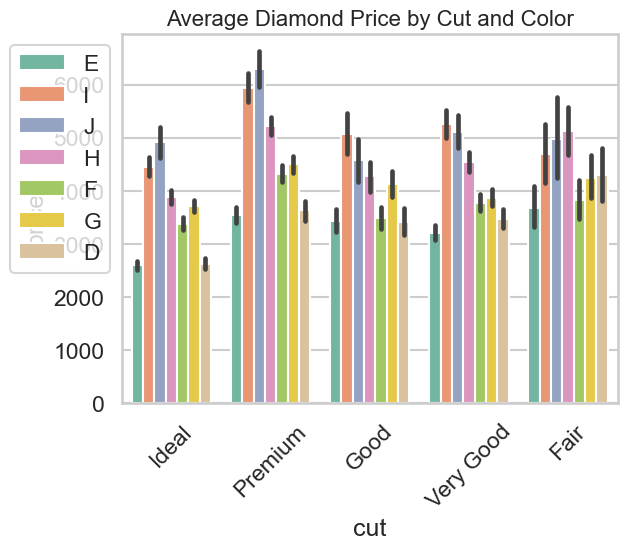

In [47]:
sns.barplot(data=df, x="cut", y="price", hue="color", palette="Set2")
plt.legend(bbox_to_anchor = (0, 1))
plt.xticks(rotation=45)
plt.title("Average Diamond Price by Cut and Color", fontsize=16)
plt.show()

## ⭐: Adjust Y-Axis Scale

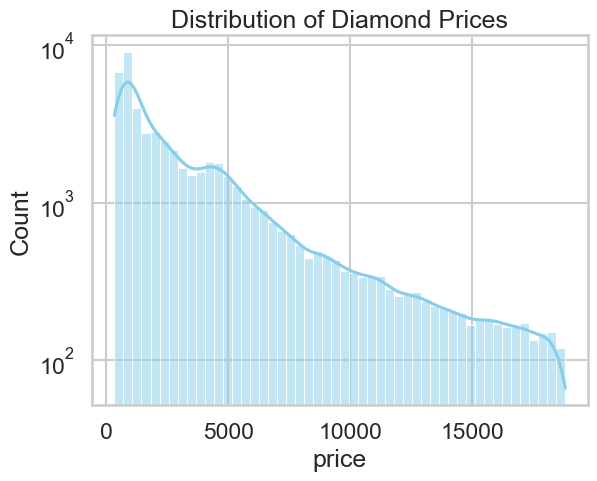

In [48]:
sns.histplot(data=df, x="price", bins=50, kde=True, color="skyblue")
plt.yscale("log")
plt.title("Distribution of Diamond Prices")
plt.show()

## ⭐: Applying the "Ticks"

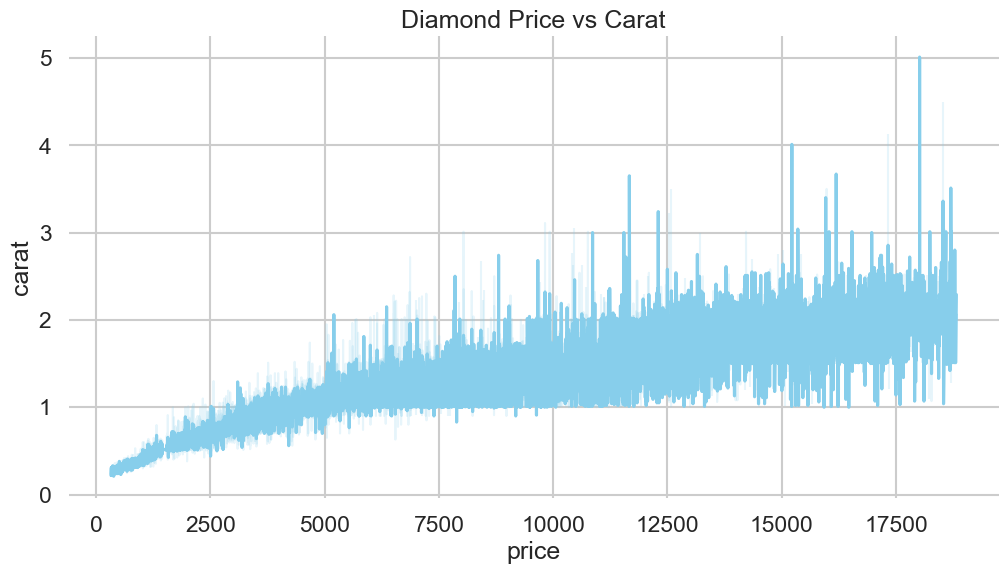

In [53]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid", context="talk",palette= "Set2")
sns.lineplot(data=df, x="price", y="carat", color="skyblue")
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=12,Markdown = "o")
plt.title("Diamond Price vs Carat")
plt.show()

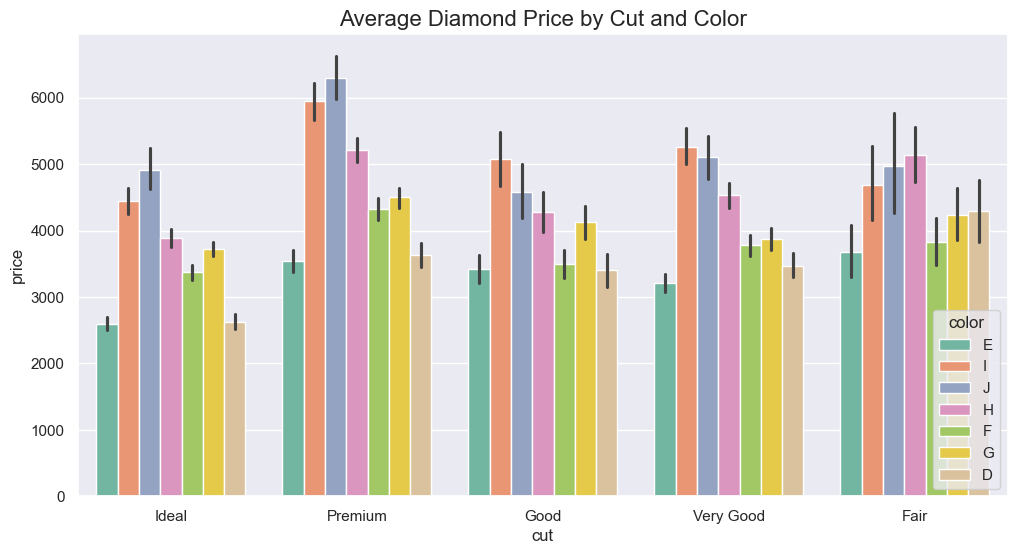

In [56]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="cut", y="price", hue="color", palette="Set2")
plt.title("Average Diamond Price by Cut and Color", fontsize=16)
plt.show()

## ⭐: Plot_Save

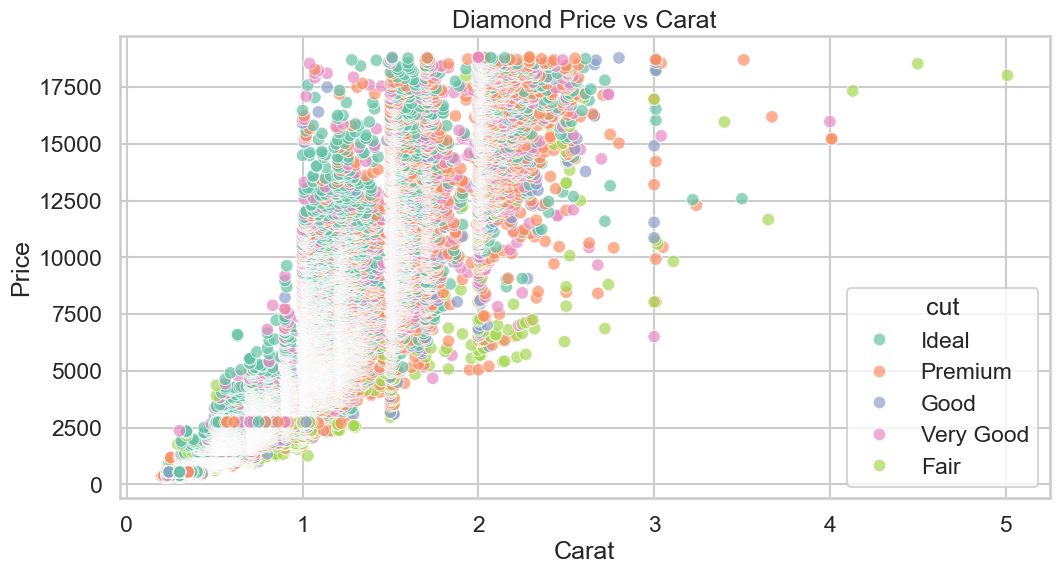

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
df = pd.read_csv(url)

# Set theme
sns.set_theme(style="whitegrid", context="talk", palette="Set2")

# Create figure
plt.figure(figsize=(12, 6))

# Scatter plot: Price vs Carat
sns.scatterplot(data=df, x="carat", y="price", hue="cut", alpha=0.7)

# Title and labels
plt.title("Diamond Price vs Carat")
plt.xlabel("Carat")
plt.ylabel("Price")

# Save in multiple formats
for ext in ["png", "pdf", "svg"]:
    plt.savefig(f"Diamond_Price_vs_Carat.{ext}", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## ⭐: Palettes Names  
  

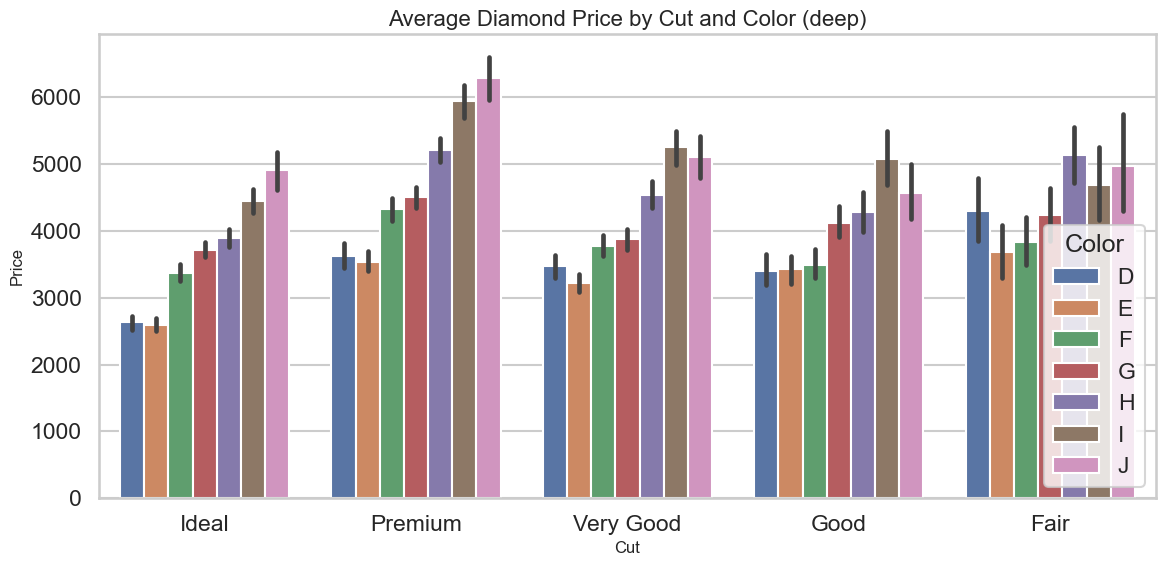

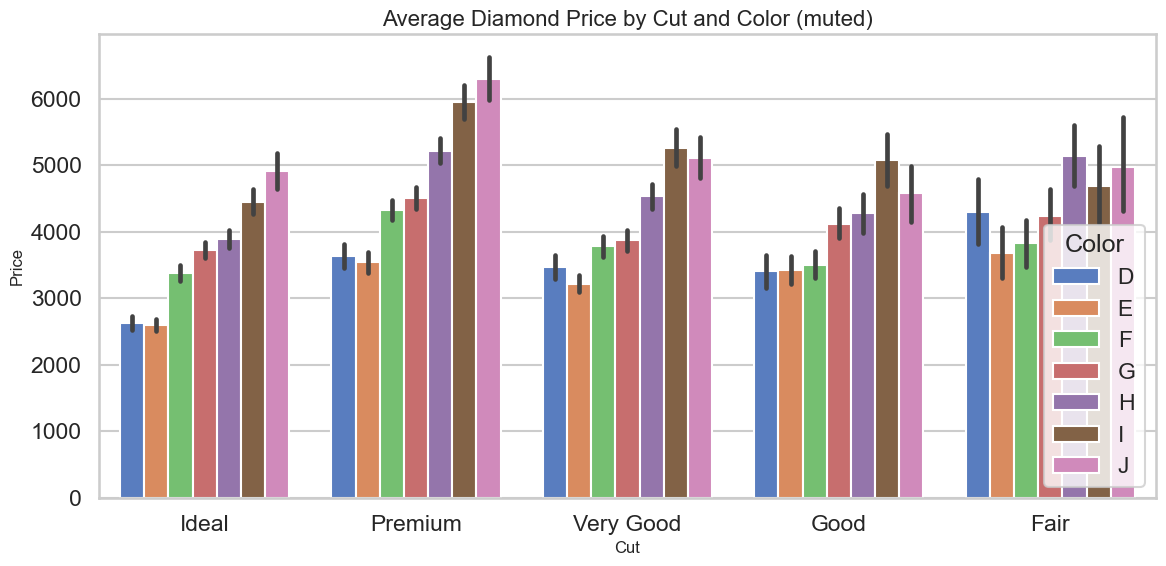

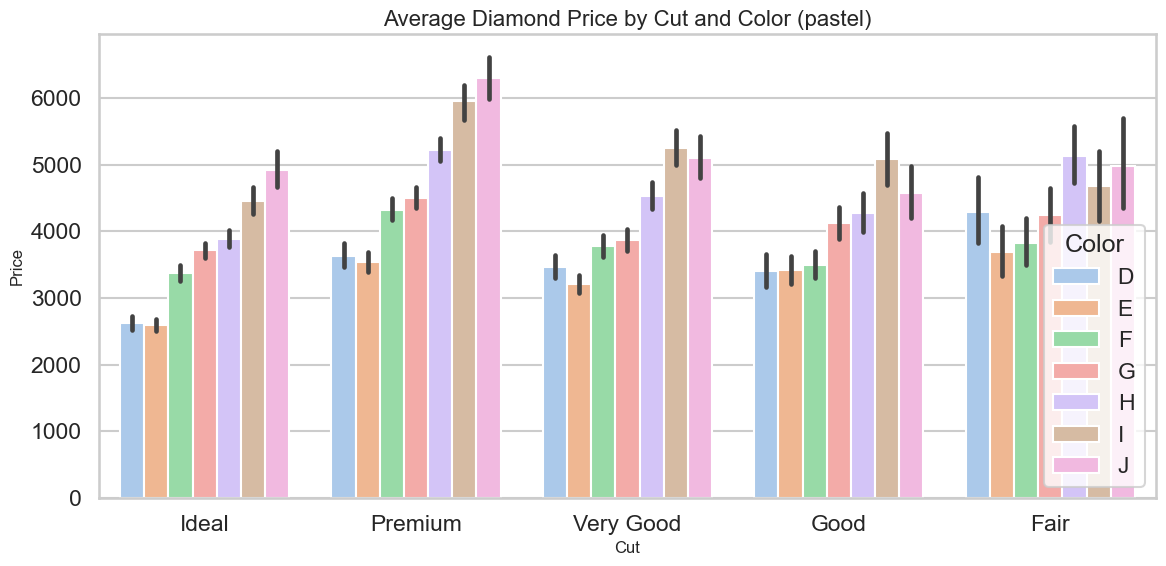

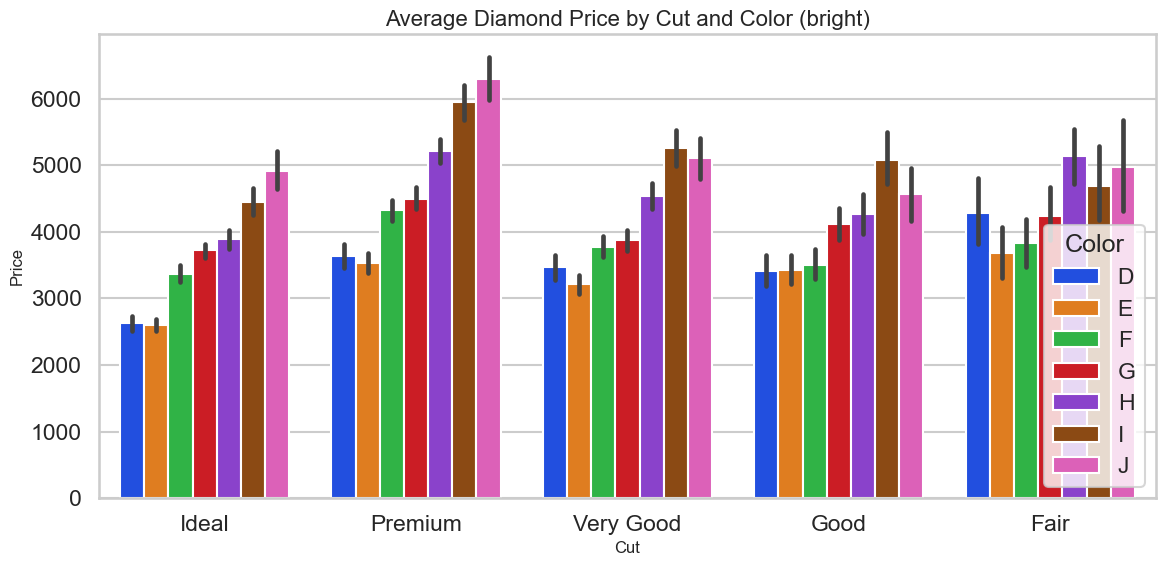

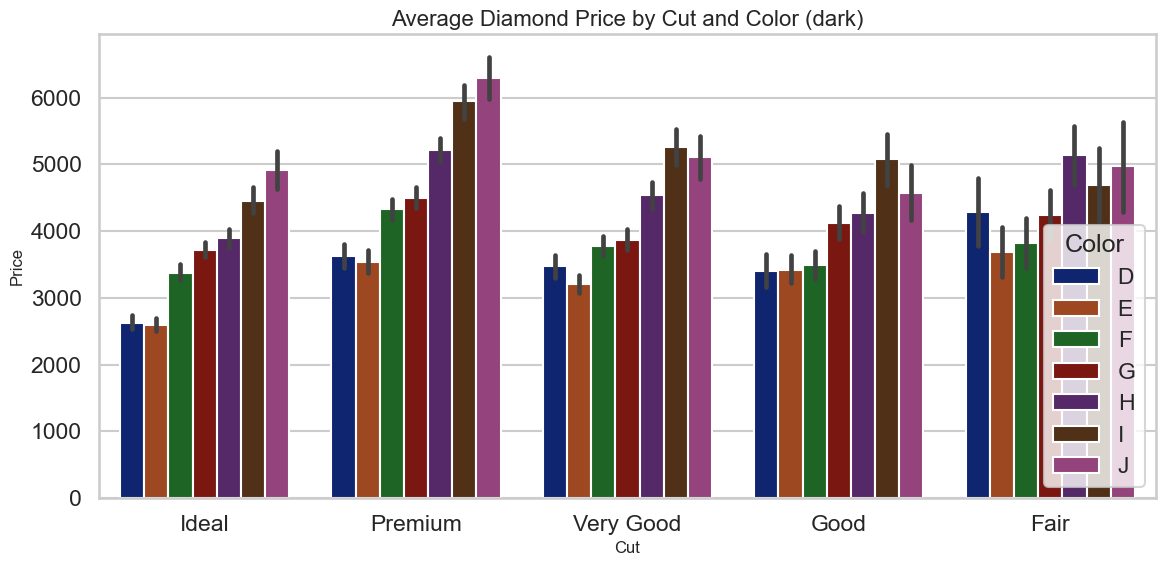

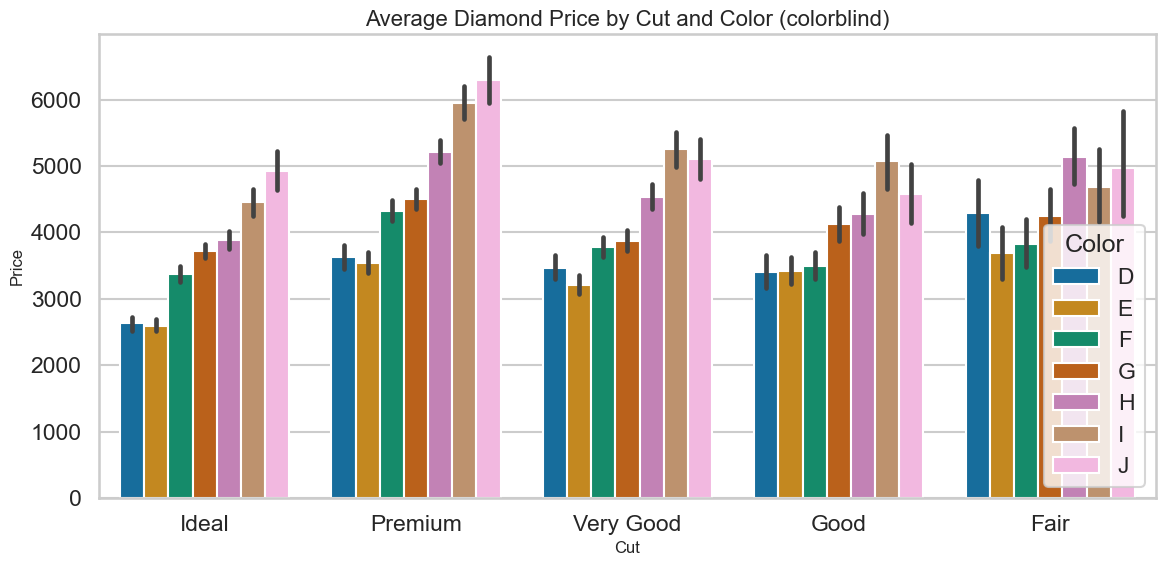

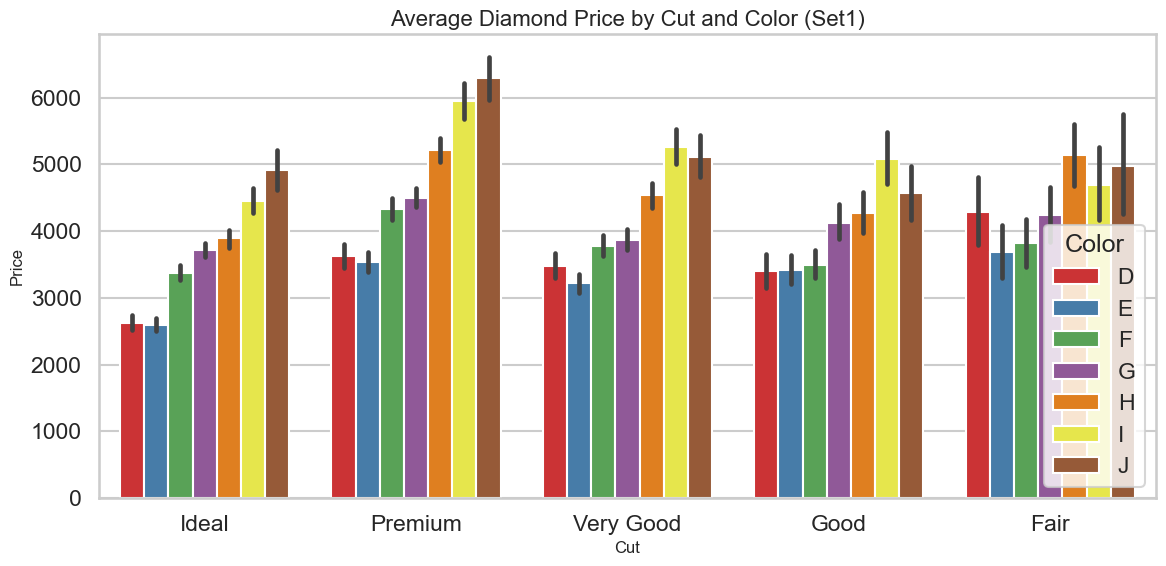

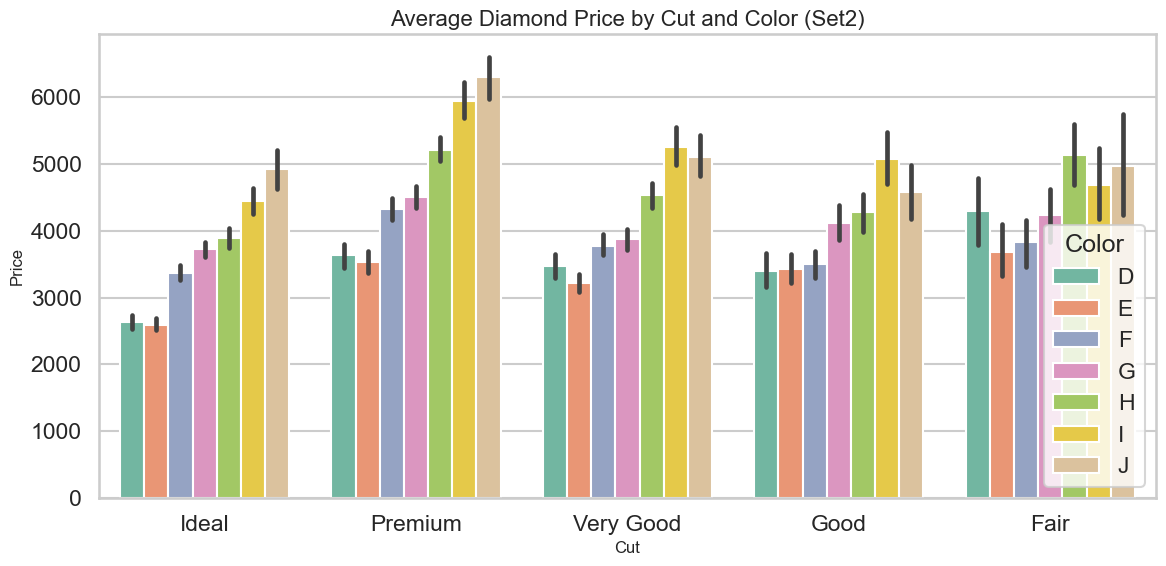

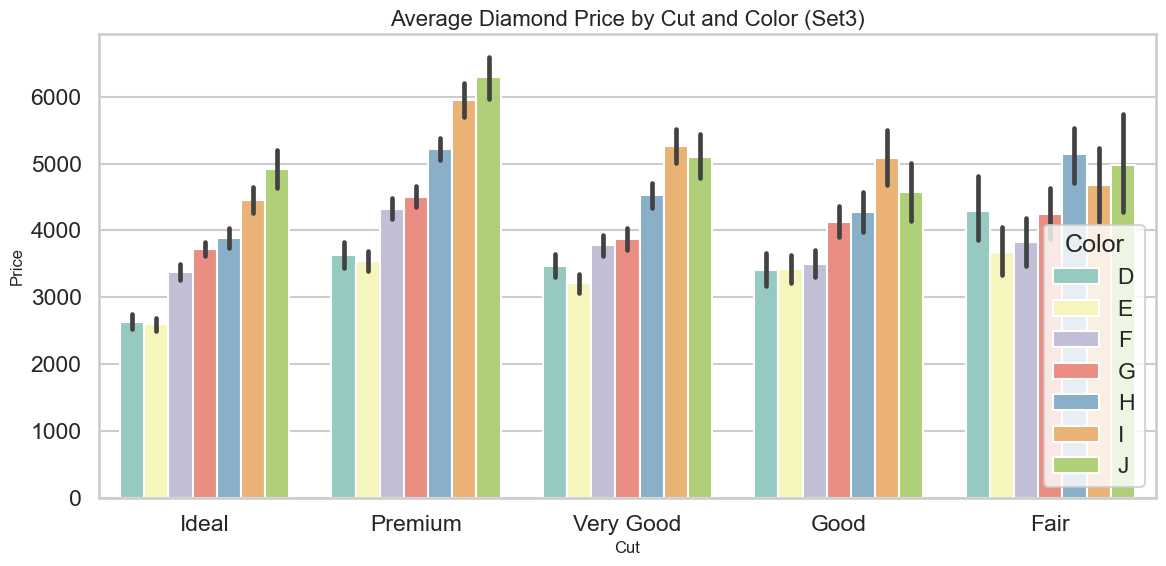

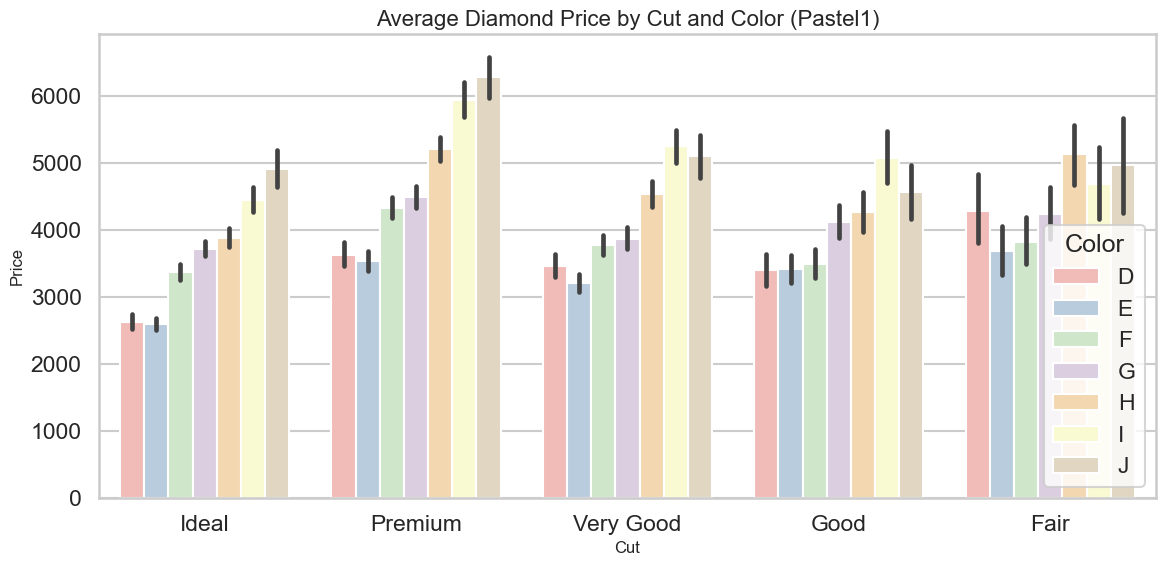

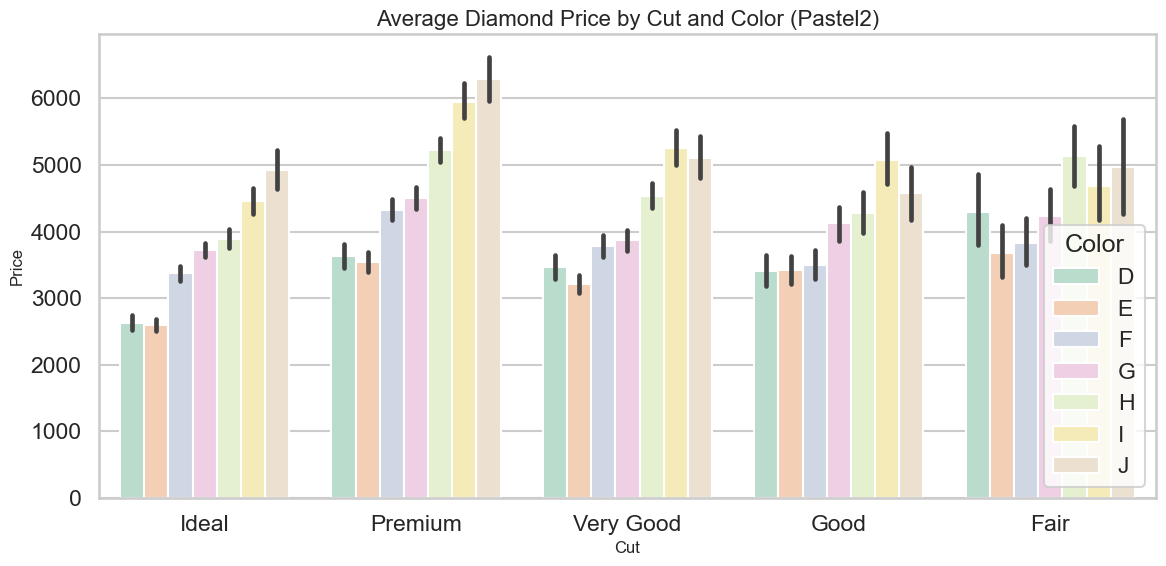

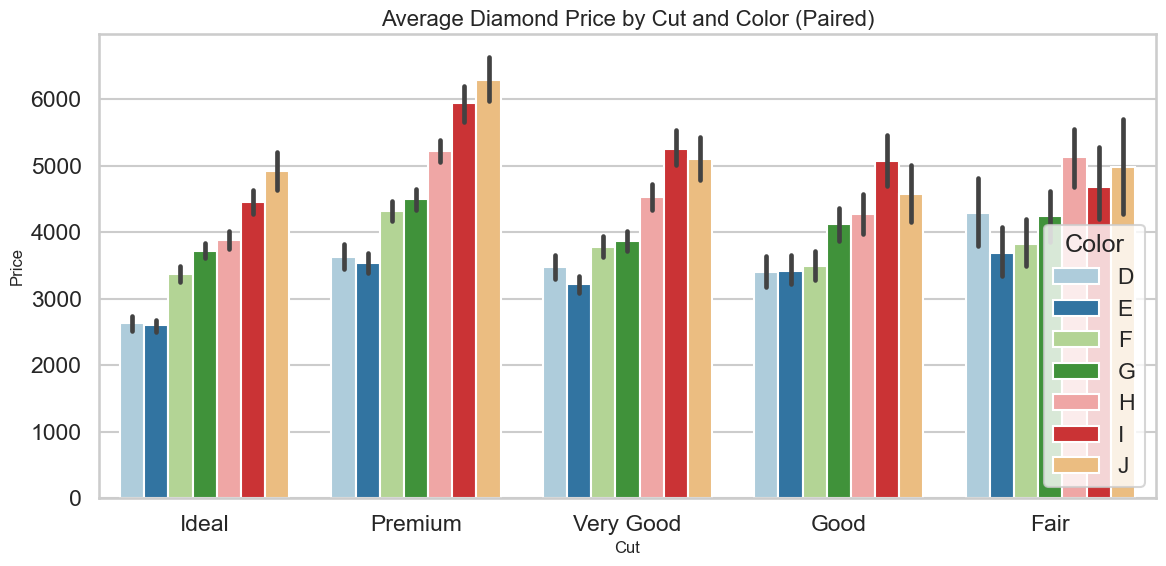

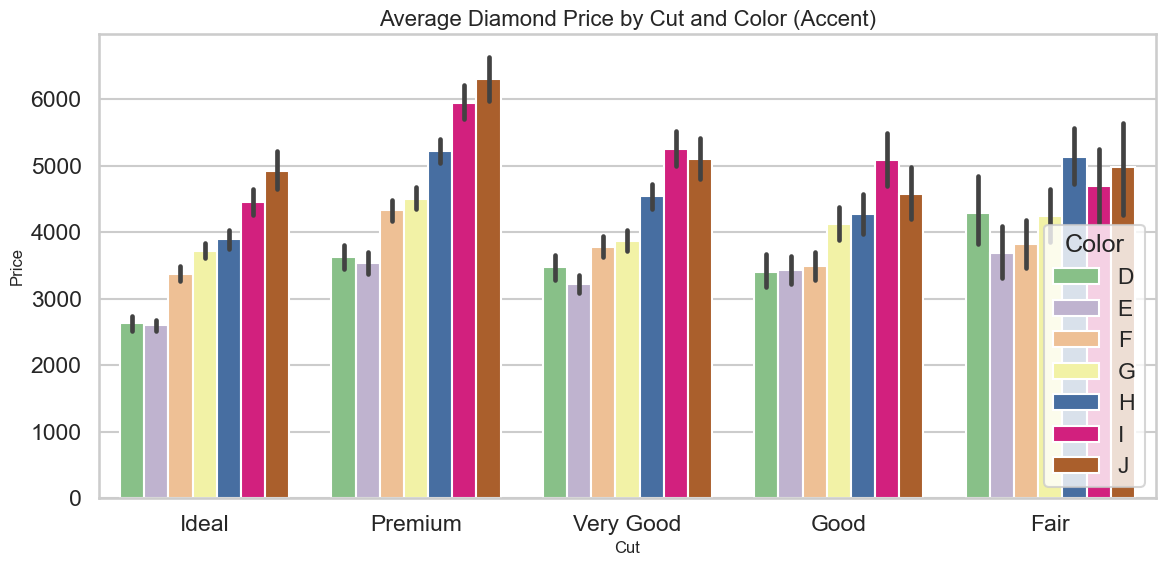

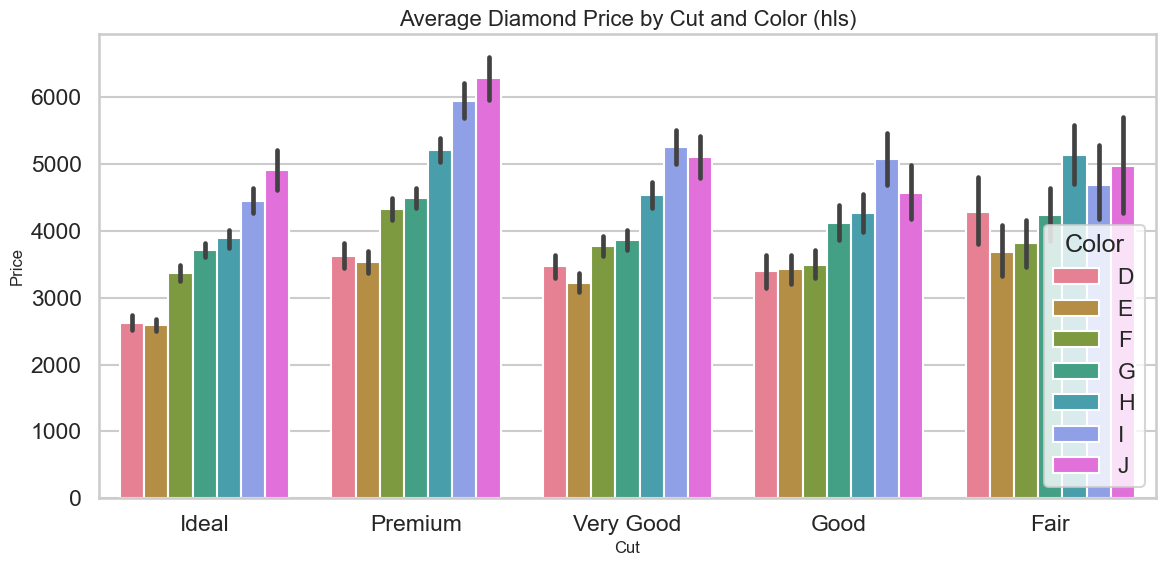

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (example: diamonds dataset from seaborn)
df = sns.load_dataset("diamonds")

# List of palettes to try
palettes = [
    "deep", "muted", "pastel", "bright", "dark", "colorblind",
    "Set1", "Set2", "Set3", "Pastel1", "Pastel2", "Paired", "Accent", "hls"
]

# Loop through palettes and plot
for palette in palettes:
    sns.set_palette(palette)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x="cut", y="price", hue="color")
    plt.title(f"Average Diamond Price by Cut and Color ({palette})", fontsize=16)
    plt.xlabel("Cut", fontsize=12)
    plt.ylabel("Price", fontsize=12)
    plt.legend(title="Color")
    plt.tight_layout()
    plt.show()
